__Eithar Elfatih Burie Abdelrahman DS2403__

 <div style= 'background-color: lightgreen; color: purple;  padding :10px;'>
<h1>  Loan Application Status Prediction</h1>
 </div>


 <div style= 'color: purple;  padding :10px;'>
<h2> Problem Identification</h2>
 </div>

 <div style= 'color: green;  padding :10px;'><h3> Project Description</h3>
 </div>

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

 <div style= 'color: green;  padding :10px;'><h3>Independent Variables:</h3>
 </div>
 
    1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
    2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
    3.	Married - This refers to applicant being in a state of matrimony
    4.	Dependents - This refres to persons who depends on the applicants for survival
    5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
    6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
    7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
    8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
    9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
    10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
    11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
    12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
    13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

Dataset Link-  
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Loan%20Application%20Status/loan_prediction.csv






__________________________

 <div style= 'background-color: purple; color: lightgreen;  padding :10px;'> <h1> Import necessary libraries</h1>  </div>


In [106]:
#Import necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import sklearn

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
from scipy.stats import skew, stats, boxcox,yeojohnson
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso, Ridge,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [2]:
#read dataset
URL=r'C:\\Users\\eitha\\OneDrive\\Documents\\data science\\datatrained\\flip robo internship\\evaluation projects\\loan data.csv'
loan_=pd.read_csv(URL)


_______

 <div style= 'background-color: purple; color: lightgreen;  padding :10px;'> <h1> Exploratory Data Analysis</h1>  </div>


 <div style= 'color: green;  padding :10px;'><h3>Head / Tail</h3>
 </div>


In [3]:
#create dataframe of csv
df=pd.DataFrame(loan_)
df.index=df.index+1

#show max
pd.set_option('Display.max_columns', None)

#show dataset head 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
3,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
4,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
5,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#show dataset tail
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
610,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
611,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
612,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
613,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
614,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


Here we have a brief idea about the size and layout of the dataset.

 <div style= 'color: green;  padding :10px;'><h3>__Data Structure__</h3>
 </div>


 <div style= 'color: purple;  padding :10px;'><h4>Size, Shape and Columns</h4>
 </div>


In [5]:
# show size/shapecolumns of our dataset.
print('The dataset has a size of:',df.size)
print('The dataset has a shape:',df.shape)
print('The dataset has a set of columns:\n',df.columns)

The dataset has a size of: 7982
The dataset has a shape: (614, 13)
The dataset has a set of columns:
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


 <div style= 'color: purple;  padding :10px;'><h4>Info</h4>
 </div>

In [6]:
#Show information about the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 1 to 614
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


 <div style= 'color: purple;  padding :10px;'><h4>__Data type__</h4>
 </div>

In [7]:
# show data types sorted
print('The data type of each column is as follows:\n')
print(df.dtypes.sort_values())

The data type of each column is as follows:

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
Property_Area         object
Loan_Status           object
dtype: object


After checking the basic information of our dataset, we can observe the following: 

- The data set is of medium size consisting of 614 rows and 13 columns. 
- There are 3 data types: int64, float64 and object so we are working with both numerical and categorical data
- From df.info we can see that there are so null values in various features that need to be sorted



 <div style= 'background-color: purple; color: white;  padding :10px;'> <h1> Objective</h1>  </div>



__The goal of this project is to build and develop a machine learning model,that predicts the outcome of a loan application, based on the above mentioned features. As the target variable is categorical ('Loan_status') and provides two possible outcomes, our problem is a classication type.  '__


<div style= 'color: green;  padding :10px;'><h3>Feature types</h3>
 </div>

 <div style= 'color: purple;  padding :10px;'><h4>__Numerical features :__ </h4>
 </div>

- ApplicantIncome      >>> Numerical
- CoapplicantIncome    >>> Numerical
- LoanAmount           >>> Numerical
- Loan_Amount_Term     >>> Numerical

_________________________________________________________

 <div style= 'color: purple;  padding :10px;'><h4>__Categorical features :__</h4>
 </div> 

- Loan_ID              >>> Categorical 
- Gender               >>> Categorical
- Married              >>> Categorical
- Dependents           >>> Categorical
- Education            >>> Categorical
- Self_Employed        >>> Categorical
- Credit_History       >>> Categorical (numerical, however is categorized)
- Property_Area        >>> Categorical
 <div style= 'color: purple;  padding :10px;'><h4>__Target Feature:__</h4>
 </div> 

- Loan_Status          >>> (Categorical)

<div style= 'color: green;  padding :10px;'><h3>__Reorder Columns__</h3>
 </div>

In [8]:
#move Target to first column
# list of columns 
cols_=list(df.columns)

cols_.remove('Loan_Status')

order_=['Loan_Status'] + cols_

df_=df[order_]

df_

,Loan_Status,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Y,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
2,N,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
3,Y,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
4,Y,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
5,Y,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Y,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
611,Y,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
612,Y,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
613,Y,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


<div style= 'color: green;  padding :10px;'><h3>Define Feature Categories</h3>
 </div>

In [9]:
# create categorical and numerical list (without targets)
num_cols=[]
cat_cols=[]

for col in df_.dtypes.index:
    if col =='Loan_Status':
        continue
    if df_.dtypes[col] in ['int64','float64']:
        num_cols.append(col)
    elif df_.dtypes[col] in ['object']:
        cat_cols.append(col)
        
# put 'Credit_History' in cat_cols
if 'Credit_History' in num_cols:
    num_cols.remove('Credit_History')
    cat_cols.append('Credit_History')
        
print(f'Numerical columns: \n{num_cols}')
print(len(num_cols))
print(f'\nCategorical columns:\n {cat_cols}')    
print(len(cat_cols))

Numerical columns: 
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
4

Categorical columns:
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
8


__________________________

 <div style= 'background-color: purple; color: lightgreen;  padding :10px;'> <h1>Data Pre-processing </h1>  </div>



<div style= 'color: green;  padding :10px;'><h3>Duplicates</h3>
 </div>


In [10]:
#indentify amount of duplicates (if any)
print('From this, we can see there are no duplicates in this data set.')
df_.duplicated().sum()

From this, we can see there are no duplicates in this data set.


0

<div style= 'color: green;  padding :10px;'><h3>Missing Values</h3>
 </div>

In [11]:
# sum of missing values in data set 
print('From this, we can see there are many null values in the data set. Now i will investigate further and either drop or impute')
df_.isnull().sum().sum()

From this, we can see there are many null values in the data set. Now i will investigate further and either drop or impute


149

<div style= 'color: green;  padding :10px;'><h3>Heatmap of nulls</h3>
 </div>

<Axes: >

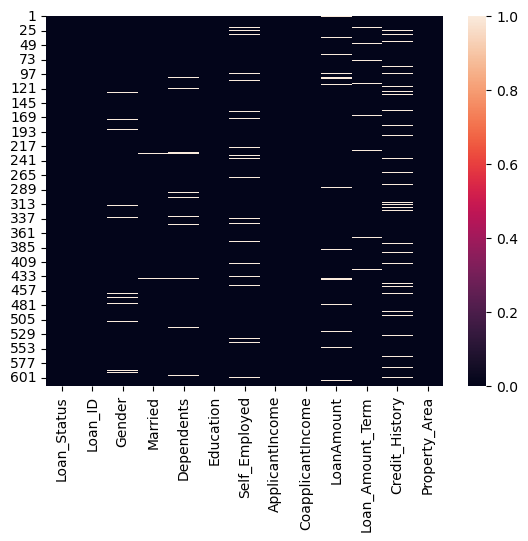

In [12]:
sns.heatmap(df_.isna())

- There are some missing values in our datset.

<div style= 'color: green;  padding :10px;'><h3>NULL VALUE SORTING</h3>
 </div>

In [13]:
#create dataframe of missing values 
missing_=df_.isnull().sum()

missing_=missing_[missing_>0]

missing_per=round(missing_/len(df_)*100,2)

unique_c= df_.nunique()
           
missing_df=pd.DataFrame({'Column Name': missing_.index,
                         'Missing Values': missing_.values,
                         'Missing Value %':missing_per,
                         'Unique Values':missing_.index.map(unique_c),
                         'Type': ['Numerical' if df_[col].dtype in ('int64', 'float64') else 'Categorical' for col in missing_.index]})

missing_df=missing_df.sort_values(by=['Type' ,'Missing Values'], ascending=[False, False]).reset_index(drop=True)

missing_df

,Column Name,Missing Values,Missing Value %,Unique Values,Type
0,Credit_History,50,8.14,2,Numerical
1,LoanAmount,22,3.58,203,Numerical
2,Loan_Amount_Term,14,2.28,10,Numerical
3,Self_Employed,32,5.21,2,Categorical
4,Dependents,15,2.44,4,Categorical
5,Gender,13,2.12,2,Categorical
6,Married,3,0.49,2,Categorical


- To look at in more detail, I will seperatly look into numerical and categorical features 

<div style= 'color: green;  padding :10px;'><h3>Numerical features null sorting</h3>
 </div>

In [14]:
tot_null=df_[num_cols].isna().sum().sum()
tot_=df_[num_cols].size
perc_=(tot_null/tot_)*100
rows_=df_[num_cols].isna().any(axis=1).sum()
print( f'The amount of null values in num_cols is:{tot_null}')
print( f'The percentage of null values in num_cols is: {perc_:.2f}%')
print( f'The amount of rows with null values: {rows_}')

The amount of null values in num_cols is:36
The percentage of null values in num_cols is: 1.47%
The amount of rows with null values: 36


<div style= 'color: green;  padding :10px;'><h3>Categorical features null sorting</h3>
 </div>

In [15]:
tot_null_cat=df_[cat_cols].isna().sum().sum()
tot_cat=df_[cat_cols].size
perc_cat=(tot_null_cat/tot_cat)*100
rows_cat=df_.isna().any(axis=1).sum()
print( f'The amount of null values in num_cols is:{tot_null_cat}')
print( f'The percentage of null values in num_cols is: {perc_cat:.2f}%')
print( f'The amount of rows with null values: {rows_cat}')

The amount of null values in num_cols is:113
The percentage of null values in num_cols is: 2.30%
The amount of rows with null values: 134


- the amount of missing data is less than 5%, instead of dropping the 84 rows i will impute the data with eather the mean or the mode accordingly.

In [16]:
#impute cateogorical and numerical data accrodingly 

num_impute= SimpleImputer(strategy='mean')
df_[num_cols]=num_impute.fit_transform(df_[num_cols])

cat_impute= SimpleImputer(strategy='most_frequent')
df_[cat_cols]=cat_impute.fit_transform(df_[cat_cols])

print(df_[num_cols].isna().sum())
print(df_[cat_cols].isna().sum())

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64
Loan_ID           0
Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Property_Area     0
Credit_History    0
dtype: int64


<div style= 'color: green;  padding :10px;'><h3>Update numerical and categorical list</h3>
 </div>

In [17]:
# Re-select numerical columns after dropping
num_cols = df_.select_dtypes(include=['number']).columns.tolist()

# Re-select categorical columns after dropping
cat_cols = df_.select_dtypes(include=['object', 'category']).columns.tolist()

# Exclude any specific columns if necessary
# For example, if you want to exclude 'capacity_mw' from num_cols and 'primary_fuel' from cat_cols:

cat_cols = [col for col in cat_cols if col not in ['Loan_status']]

# Print the updated lists
print("Numerical Columns:\n", num_cols)
print("Number of Numerical Columns:", len(num_cols))

print("\nCategorical Columns:\n", cat_cols)
print("\nNumber of Categorical Columns:", len(cat_cols))

Numerical Columns:
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
Number of Numerical Columns: 4

Categorical Columns:
 ['Loan_Status', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

Number of Categorical Columns: 9


In [18]:
#update num cols

print(num_cols)
print(len(num_cols))   

#update cat 
cat_cols=df_.select_dtypes(include=['object']).columns.tolist()
cat_cols=[col for col in cat_cols if col != 'Loan_Status']
print(cat_cols)
print(len(cat_cols)) 

#define target variable 
t_='Loan_Status'

print(f'The target vriable is:{t_}')

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
4
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
8
The target vriable is:Loan_Status


<Axes: >

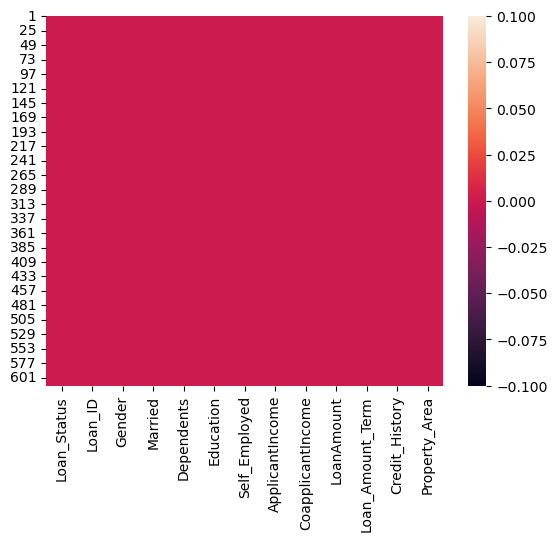

In [19]:
#visualise heatmap of nulls 
sns.heatmap(df_.isna())

In [20]:
print( 'The amount of null values was:', df.isna().sum().sum())
print( '\nThe amount of null values after dropping columns is now:', df_.isna().sum().sum())

The amount of null values was: 149

The amount of null values after dropping columns is now: 0


- Null values have been sorted 

<div style= 'color: green;  padding :10px;'><h3>Columns to drop</h3>
 </div>

In [21]:
# From the above brief observation, I can conclude that the column 'Loan_ID' is only for index reference
# Therefore i will drop this column
df_=df_.drop(['Loan_ID'],axis=1)
df_

,Loan_Status,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Y,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban
2,N,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural
3,Y,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban
4,Y,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban
5,Y,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
610,Y,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural
611,Y,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural
612,Y,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban
613,Y,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban


In [22]:
cat_cols=[col for col in cat_cols if col !='Loan_ID']
print('Catergorical columns:', num_cols)
print('\n Number of categorical columns:', len(cat_cols))

Catergorical columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

 Number of categorical columns: 7


In [23]:
print('After dropping the "Loan_ID" column, the new dataframe shape is :',df_.shape)

After dropping the "Loan_ID" column, the new dataframe shape is : (614, 12)


In [24]:
df_.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0


- all columns have a count of 614, there are no missing values 
- std of ApplicantIncome is very high, indicating a high variation in individual incomes
- CoapplicantIncome has a minimum of zero, indicating some have very low income. 
- LoanAmount median is very low compared to max indicating mjority of applicants apply for lower loans, median lower than mean indicates right skew
- overwhelming majority of applicants have 360 as there term, hardly any variation

<div style= 'color: green;  padding :10px;'><h3>Summary of data reading</h3>
 </div>

- Data set (after dropping irrelevent features) has 907 rows and 12 columns.
- All columns are of type float64' or 'object'. There is both numerical and categorical data.
- There are no duplicates.
- There were some null values, i have imputed the numerical ones with the mean and the categorical ones with the most frequent.
- 'Loan_Status' is our target variables. The 12 other variables are independent.



 <div style= 'background-color: purple; color: lightgreen;  padding :10px;'> <h1>Feature Analysis </h1>  </div>


 <div style= 'color: purple;  padding :10px;'> <h2> Visual analysis</h2>  </div>



 <div style= 'color: green;  padding :10px;'> <h3> Univariate analysis</h3>  </div>

 <div style= 'color: green;  padding :10px;'> <h3> Target variables</h3></div>

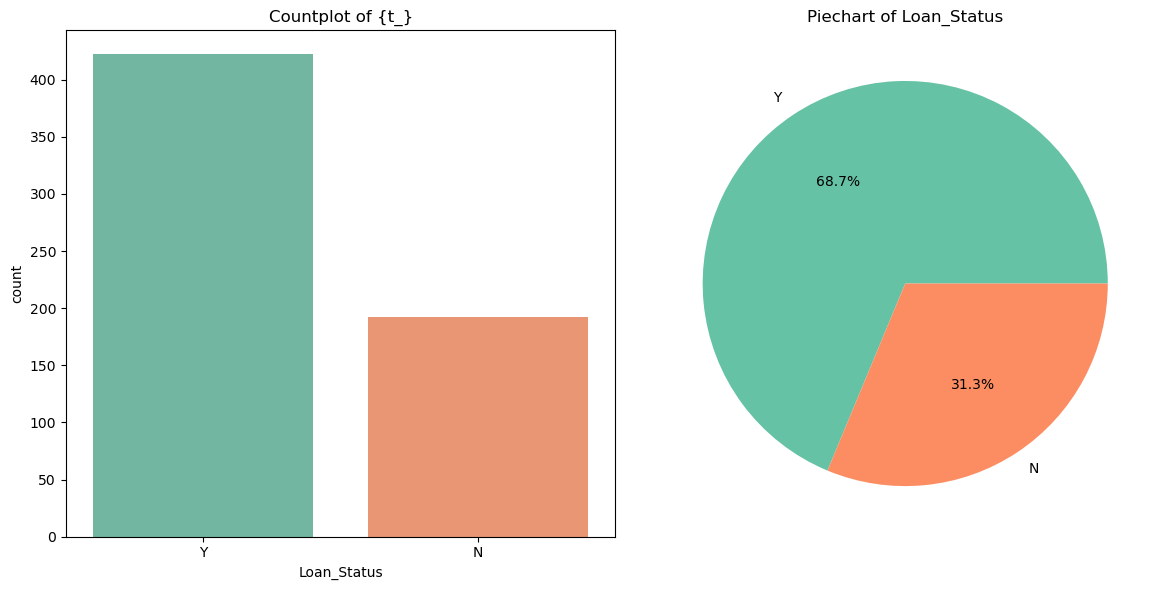

In [25]:
#visualise 'Loan_Status'

fig, axes= plt.subplots(1,2, figsize=(12,6))
#visualise coutplot
sns.countplot(x=t_,data=df_, ax=axes[0],palette=('Set2'))
axes[0].set_title('Countplot of {t_}')
                        
#visuallise piechart
axes[1].pie(df_[t_].value_counts(), labels=df_[t_].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
axes[1].set_title(f'Piechart of {t_}')
                        
plt.tight_layout()                        
plt.show()

- The data for the target variabe is unbalanced. 
- 'Y' is much higher tha 'N'

 <div style= 'color: purple;  padding :10px;'> <h2> Independant variables</h2>  </div>

 <div style= 'color: green;  padding :10px;'> <h3> Numerical Columns</h3>  </div>

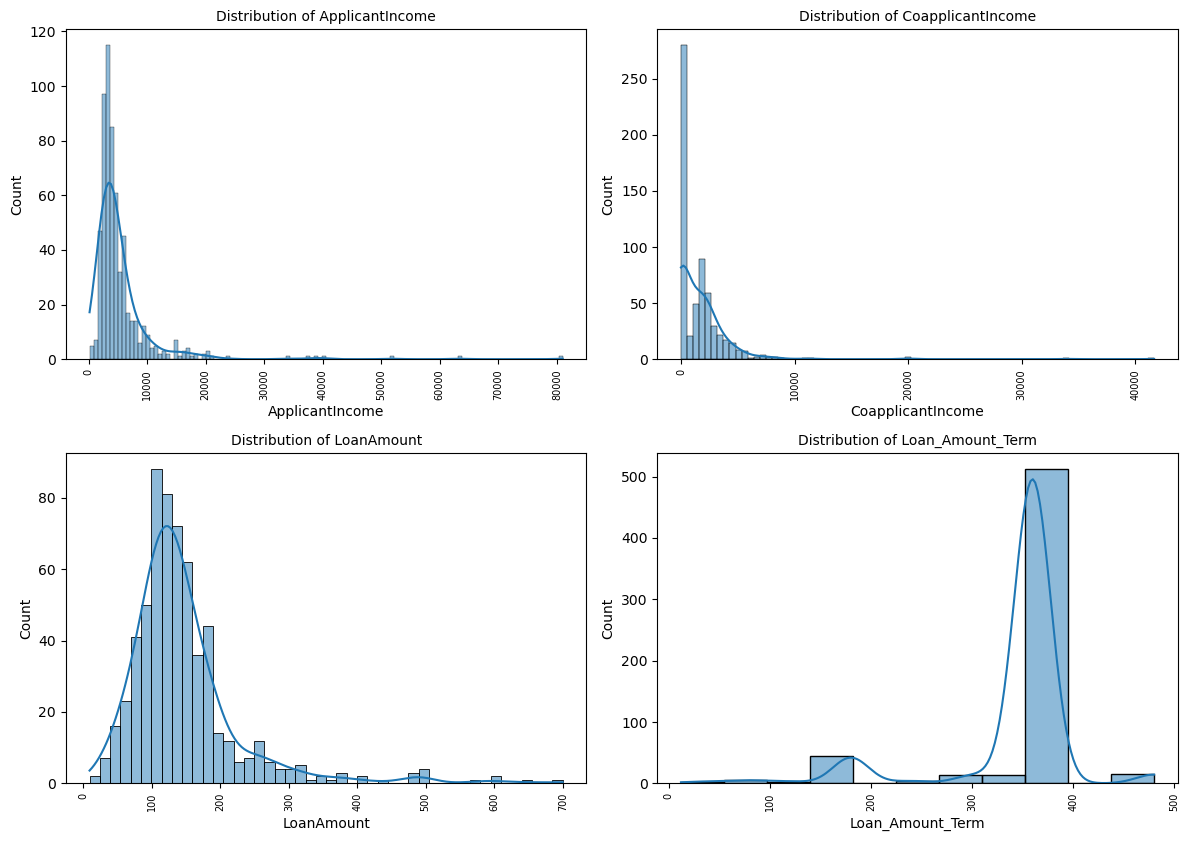

In [26]:
# plot countplots for numerical columns
plt.figure(figsize=(12, 25))

for i, col in enumerate(num_cols,1):
    plt.subplot(6,2,i)
    sns.histplot(df_[col], kde=True, palette='Set2') 
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xticks(rotation=90, fontsize=7)

plt.tight_layout()
plt.show()

 <div style= 'color: green;  padding :10px;'> <h3> Univariate box plot</h3>  </div>

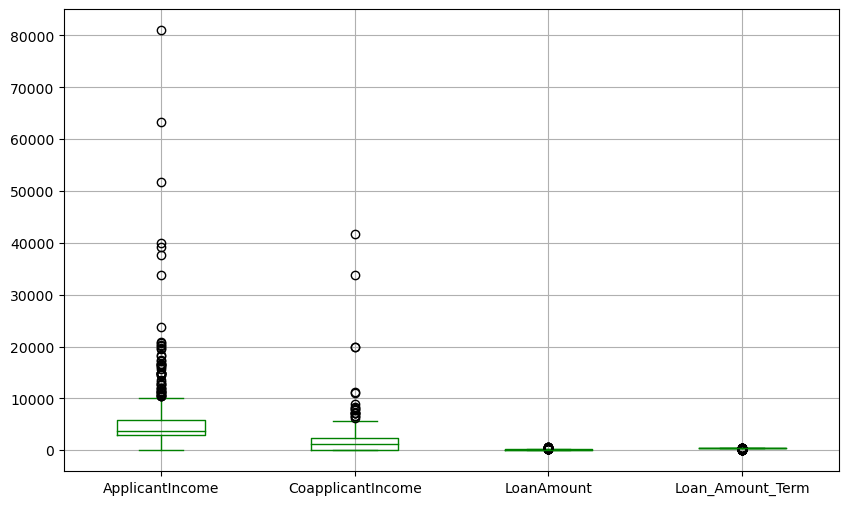

In [27]:
plt.figure(figsize=(10,6))
df_.boxplot(column=num_cols, figsize=(10,10), color='green')
plt.show()


this confirms the outliers in each feature. 
- ApplicantIncome has many, this is a result of the income difference among the applicants. 
- CapplicantIncome is very similar is dispersity however the highest (41000_ is half that of the ApplicantIcome highest.
-

Numerical-Categorical Column

from the above graphs i can see tht Loan_Amount_Term is more suited to be categorical. I will now observe it as such 

In [28]:
cat_cols.append('Loan_Amount_Term')

In [29]:
loan_counts=df_['Loan_Amount_Term'].value_counts()
perc_loan= loan_counts/loan_counts.sum()*100
table_1=perc_loan.reset_index()
table_1.columns=['Loan_Amount_Term','Percentage']

table_1

,Loan_Amount_Term,Percentage
0,360.0,83.387622
1,180.0,7.166124
2,480.0,2.442997
3,342.0,2.280130
4,300.0,2.117264
5,240.0,0.651466
6,84.0,0.651466
7,120.0,0.488599
8,60.0,0.325733
9,36.0,0.325733


There is a hiuge imbalance in this feature. the overwhelming majority have a term of 360 while the rest( the second highest is &.1%) are all less than 10%.


 <div style= 'color: green;  padding :10px;'> <h3> Categorical Columns</h3>  </div>

In [30]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Amount_Term']

 <div style= 'color: purple;  padding :10px;'> <h3> Count Plots</h3>  </div>

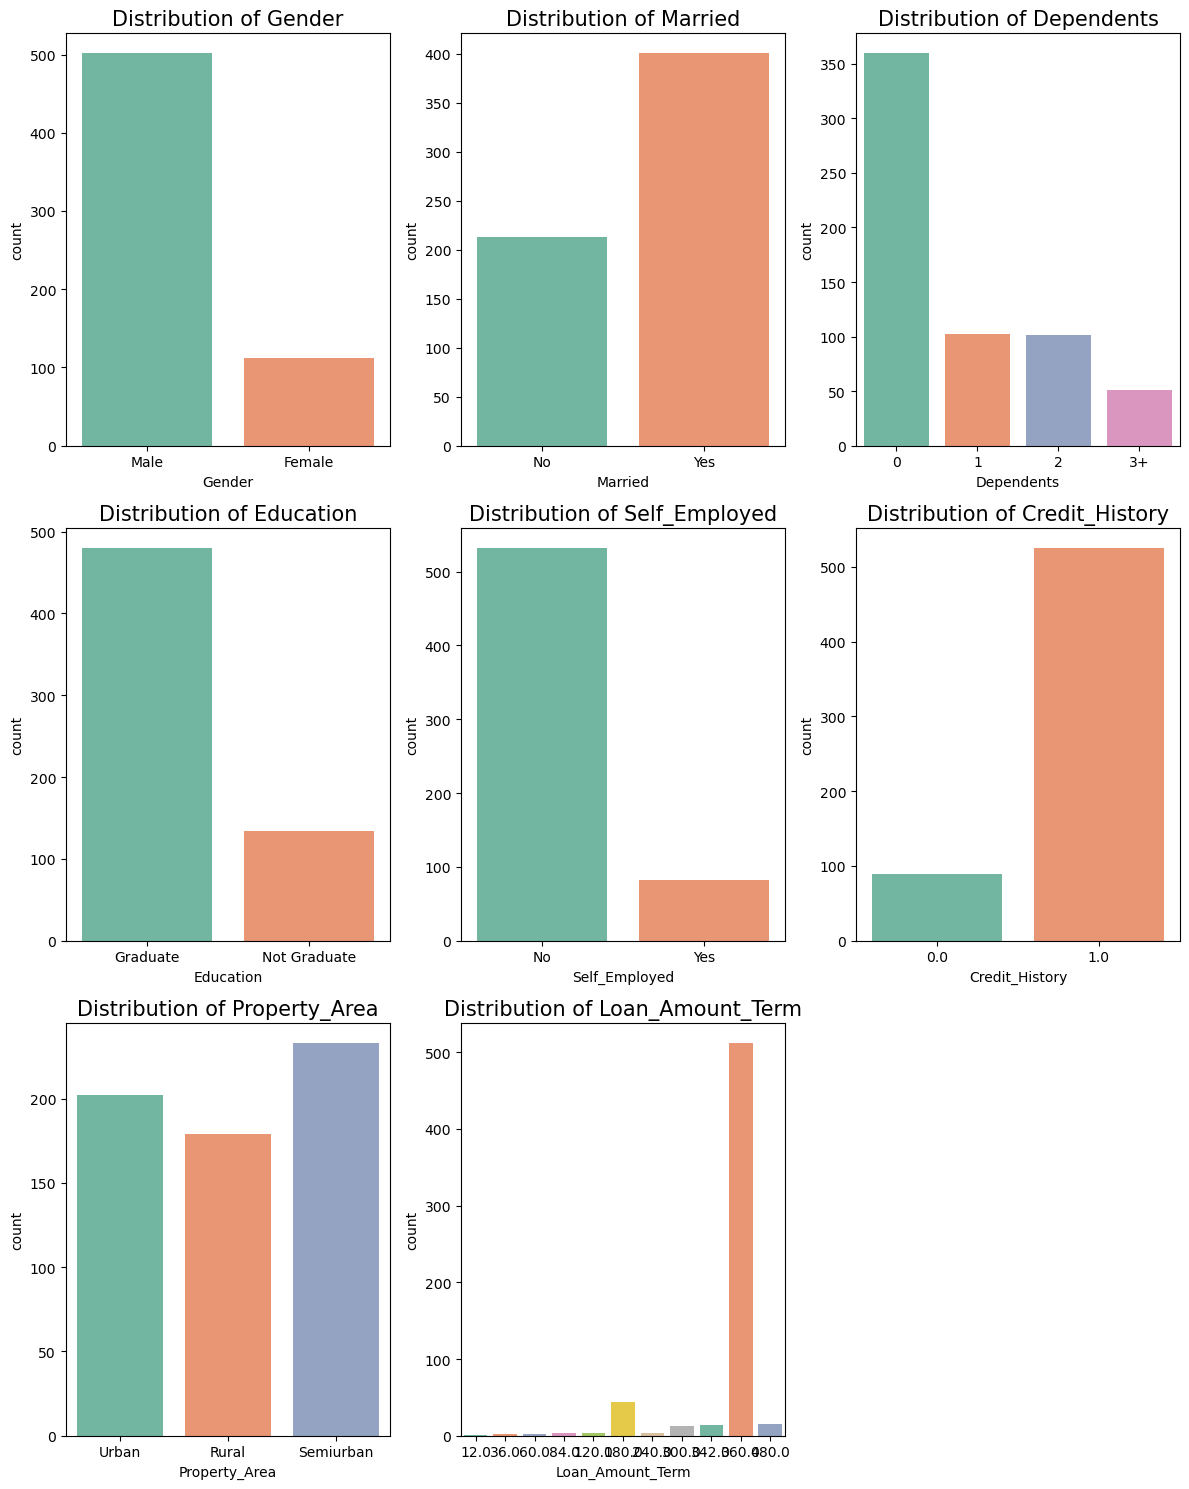

In [31]:
# plot countplots for num_cat_cols columns
plt.figure(figsize=(12, 15))

for i, col in enumerate(cat_cols,1):
    plt.subplot(3,3,i)       
    sns.countplot(x=col, data=df_, palette='Set2') 
    plt.title(f'Distribution of {col}', fontsize=15)
    

plt.tight_layout()
plt.show()


 <div style= 'color: purple;  padding :10px;'> <h3> Pie Charts </h3>  </div>

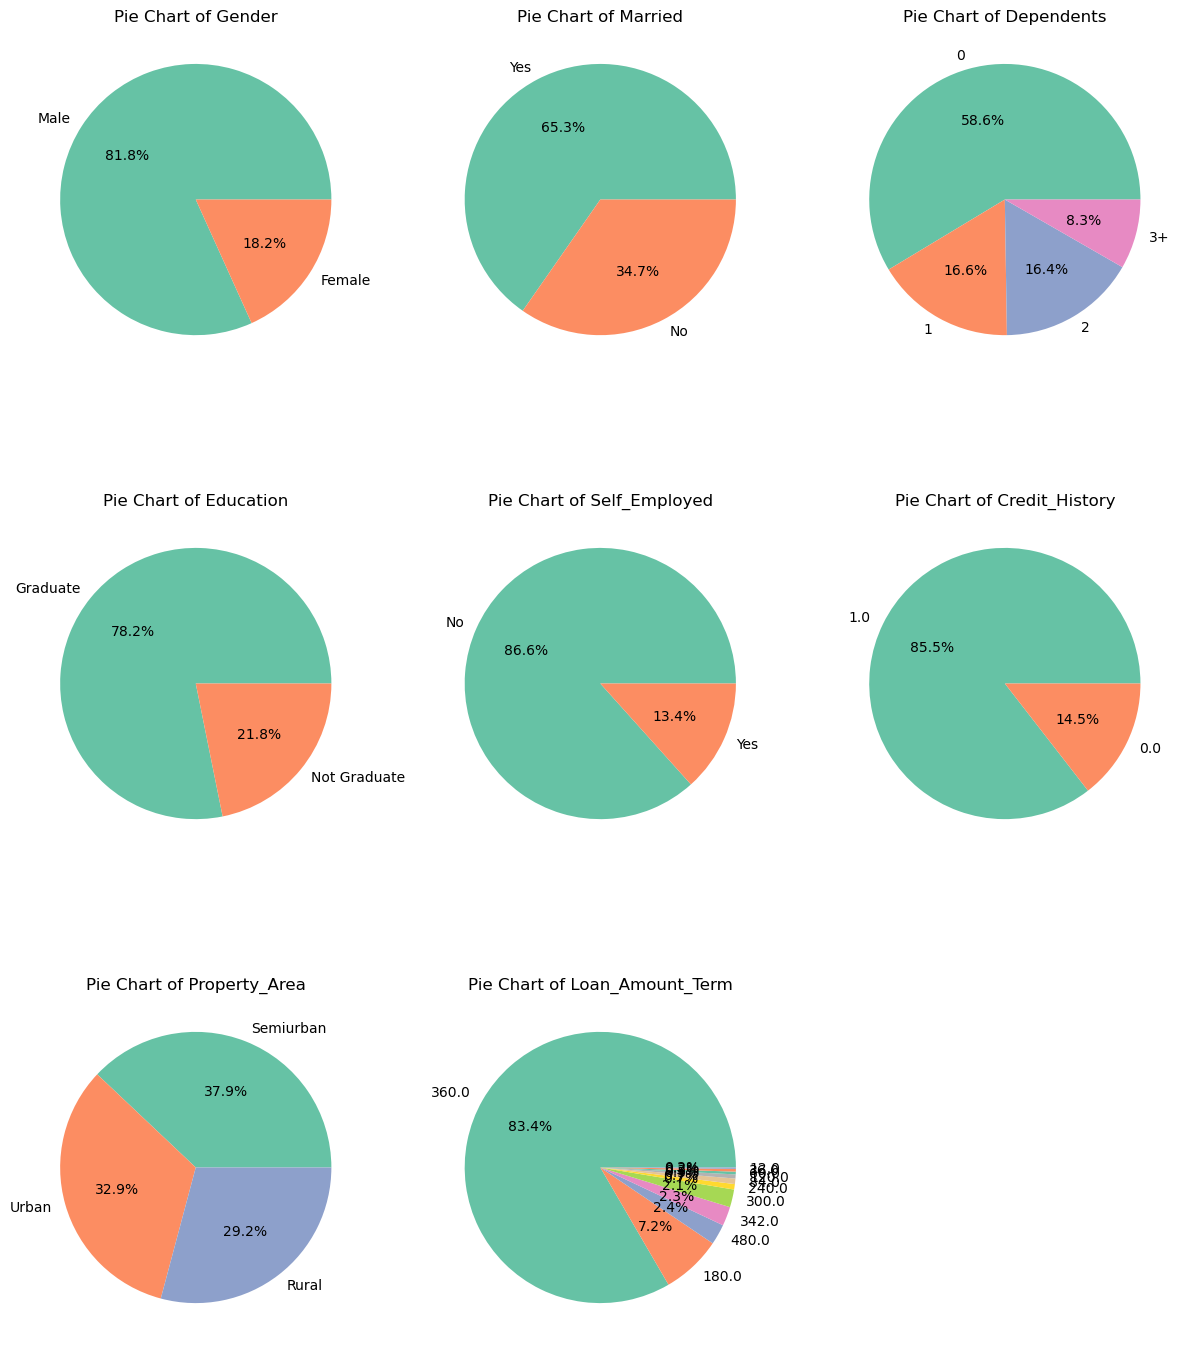

In [32]:
# piecharts  for num_cat_cols columns
plt.figure(figsize=(12, 15))

for i, col in enumerate(cat_cols,1):
    plt.subplot(3,3,i)
    plt.pie(df_[col].value_counts(), labels=df_[col].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.xticks(rotation=90)
    plt.title(f'Pie Chart of {col}')
plt.tight_layout()
plt.show()


from the above we can see:
- 81.8% of the applicants who applied are male
- 65.3% of the applicants are married
- 58.6% of applicants do not have dependents
- 78.2% are graduates
- 86.6% are self employed
- 85.5% have credit history 
- property area is rather balanced (especially comparted to the other features) however, the higher majority is Semiurban(37.9%)
- 8.3% of the applicants loan amount terms were 360.


- all have imbalanced data 
- property Area most balanced 



 <div style= 'color: purple;  padding :10px;'> <h3>Value counts </h3>  </div>

In [33]:
for col in cat_cols:
    print(f'\n Value counts for {col}:')
    print(df_[col].value_counts())
    print()


 Value counts for Gender:
Male      502
Female    112
Name: Gender, dtype: int64


 Value counts for Married:
Yes    401
No     213
Name: Married, dtype: int64


 Value counts for Dependents:
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


 Value counts for Education:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


 Value counts for Self_Employed:
No     532
Yes     82
Name: Self_Employed, dtype: int64


 Value counts for Credit_History:
1.0    525
0.0     89
Name: Credit_History, dtype: int64


 Value counts for Property_Area:
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


 Value counts for Loan_Amount_Term:
360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64



 <div style= 'color: purple;  padding :10px;'> <h3> Label Encode </h3>  </div>

In [34]:
l_e=LabelEncoder()
for col in cat_cols:
    df_[col]=l_e.fit_transform(df_[col])
df_.head()

,Loan_Status,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Y,1,0,0,0,0,5849.0,0.0,146.412162,9,1,2
2,N,1,1,1,0,0,4583.0,1508.0,128.000000,9,1,0
3,Y,1,1,0,0,1,3000.0,0.0,66.000000,9,1,2
4,Y,1,1,0,1,0,2583.0,2358.0,120.000000,9,1,2
5,Y,1,0,0,0,0,6000.0,0.0,141.000000,9,1,2


In [35]:
# encode target
df_['Loan_Status']=l_e.fit_transform(df_['Loan_Status'])
df_.head()

,Loan_Status,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,0,0,0,0,5849.0,0.0,146.412162,9,1,2
2,0,1,1,1,0,0,4583.0,1508.0,128.000000,9,1,0
3,1,1,1,0,0,1,3000.0,0.0,66.000000,9,1,2
4,1,1,1,0,1,0,2583.0,2358.0,120.000000,9,1,2
5,1,1,0,0,0,0,6000.0,0.0,141.000000,9,1,2


now all fetures are encoded

 <div style= 'color: green;  padding :10px;'> <h2> Bivariate Analysis</h2>  </div>

 <div style= 'color: green;  padding :10px;'> <h3> Target vs Numerical columns </h3>  </div>

In [36]:
num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [37]:
df_['ApplicantIncome'].max()

81000.0

In [38]:
df_['CoapplicantIncome'].max()

41667.0

In [39]:
#income
bins_app=[0,2500, 5000, 6000, 81000]
labels_app=['Low', 'Medium','High', 'Very High']
bins_co=[0,1500, 4000, 42000]
labels_co=['Low', 'Medium','High']


df_['ApplicantIncome_']=pd.cut(df_['ApplicantIncome'], bins=bins_app, labels=labels_app)
df_['CoapplicantIncome_']=pd.cut(df_['CoapplicantIncome'], bins=bins_co, labels=labels_co,right=False)

le_app=LabelEncoder()
le_co=LabelEncoder()

df_['ApplicantIncome_en']=le_app.fit_transform(df_['ApplicantIncome_'])
df_['CoapplicantIncome_en']=le_co.fit_transform(df_['CoapplicantIncome_'])
df_.head(20)

,Loan_Status,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome_,CoapplicantIncome_,ApplicantIncome_en,CoapplicantIncome_en
1,1,1,0,0,0,0,5849.0,0.0,146.412162,9,1,2,High,Low,0,1
2,0,1,1,1,0,0,4583.0,1508.0,128.000000,9,1,0,Medium,Medium,2,2
3,1,1,1,0,0,1,3000.0,0.0,66.000000,9,1,2,Medium,Low,2,1
4,1,1,1,0,1,0,2583.0,2358.0,120.000000,9,1,2,Medium,Medium,2,2
5,1,1,0,0,0,0,6000.0,0.0,141.000000,9,1,2,High,Low,0,1
6,1,1,1,2,0,1,5417.0,4196.0,267.000000,9,1,2,High,High,0,0
7,1,1,1,0,1,0,2333.0,1516.0,95.000000,9,1,2,Low,Medium,1,2
8,0,1,1,3,0,0,3036.0,2504.0,158.000000,9,0,1,Medium,Medium,2,2
9,1,1,1,2,0,0,4006.0,1526.0,168.000000,9,1,2,Medium,Medium,2,2
10,0,1,1,1,0,0,12841.0,10968.0,349.000000,9,1,1,Very High,High,3,0


 <div style= 'color: purple;  padding :10px;'> <h2> Target vs Applicant</h2>  </div>

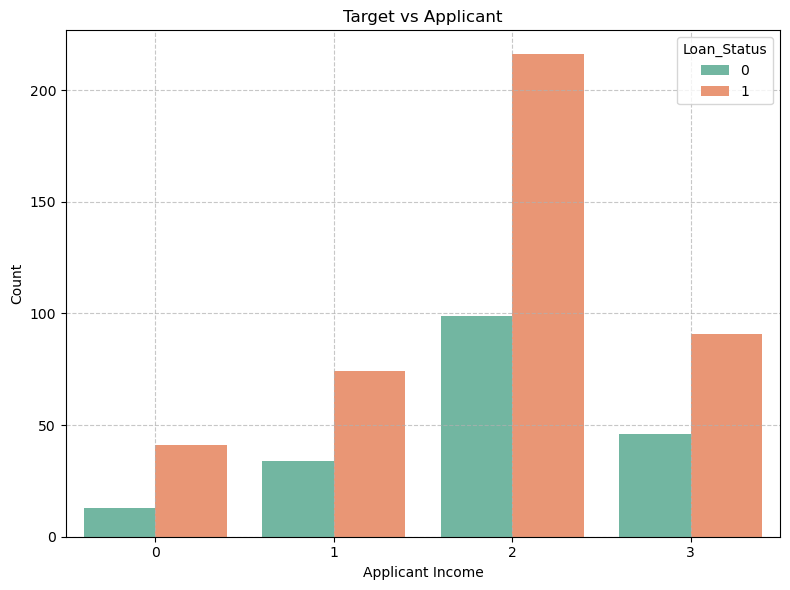

In [40]:
# create plot of 
plt.figure(figsize=(8,6))

sns.countplot(x='ApplicantIncome_en', hue='Loan_Status',data=df_, palette='Set2',dodge=True)
plt.xlabel('Applicant Income')
plt.ylabel('Count')
plt.title('Target vs Applicant')
plt.legend(title='Loan_Status')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- The above shows that applicant income hardly affects the chance of an applicants loan approval.
- it also shows that applicant with a higher income are more likely to ask for a loan.

 <div style= 'color: purple;  padding :10px;'> <h2> Target vs Coapplicant</h2>  </div>

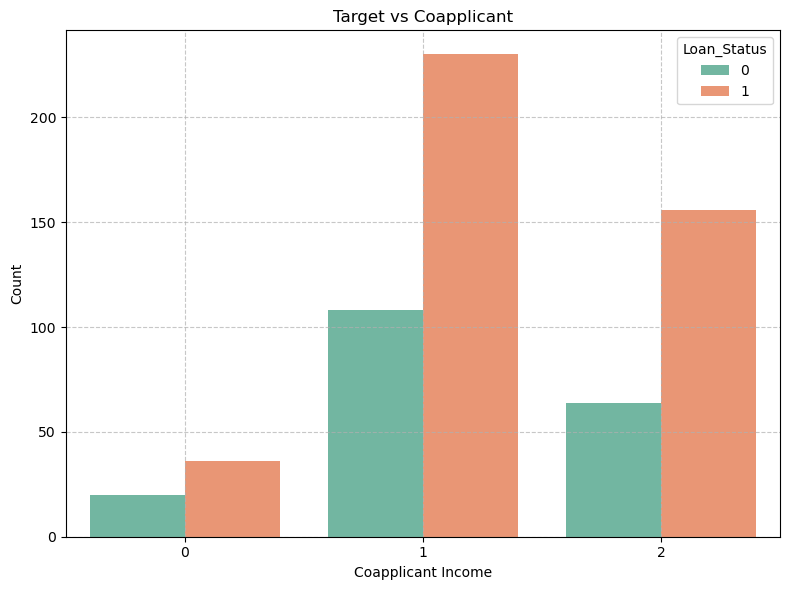

In [41]:
# create plot of 
plt.figure(figsize=(8,6))

sns.countplot(x='CoapplicantIncome_en', hue=t_,data=df_, palette='Set2', dodge=True)
plt.xlabel('Coapplicant Income')
plt.ylabel('Count')
plt.title('Target vs Coapplicant')
plt.legend(title=t_)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



- appplicants again are not more likely to achieve a loan status of 1 if the coapplicant salry isnt high 

In [42]:
# join ApplicantIncome with CoapplicantIncome

df_['TotalIncome']= df_['ApplicantIncome']+ df_['CoapplicantIncome']

In [43]:
bins_tot=[0,2500, 5000, 6000, 81000]
labels_tot=['Low', 'Medium','High', 'Very High']
df_['Total_Income']= pd.cut(df_['TotalIncome'], bins=bins_tot, labels=labels_tot)                             

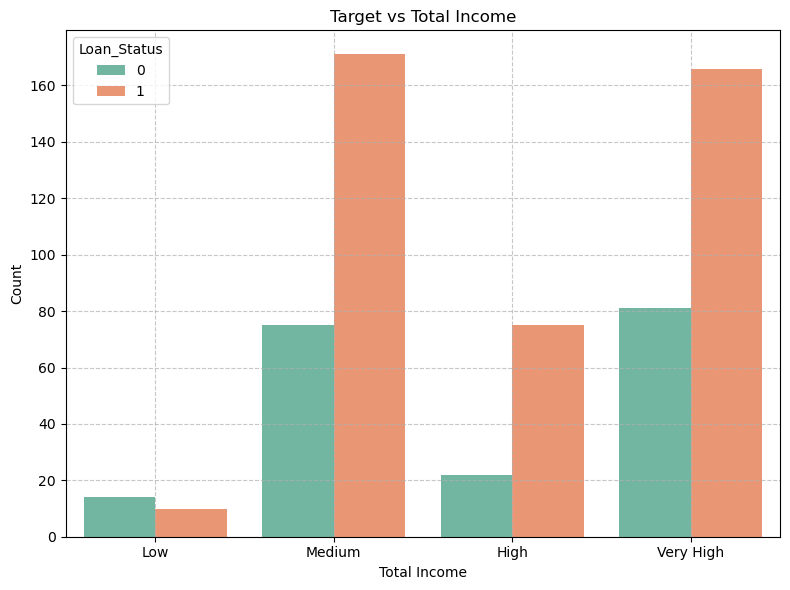

In [44]:
# create plot of 
plt.figure(figsize=(8,6))

sns.countplot(x='Total_Income', hue=t_, data=df_, palette='Set2')
plt.xlabel('Total Income')
plt.ylabel('Count')
plt.title('Target vs Total Income')
plt.legend(title=t_)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [45]:
new_num='TotalIncome'
num_cols.append(new_num)
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'TotalIncome']

- here we can see that a total lower income is less likely to apply for a loan 
- also, a low income is more likely do be disapproved

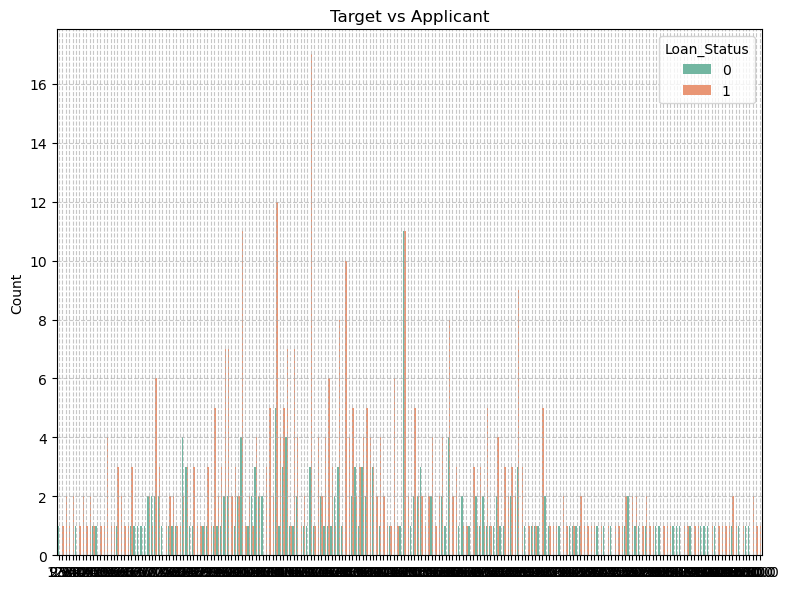

In [46]:
# create plot of 
plt.figure(figsize=(8,6))

sns.countplot(x='LoanAmount', hue='Loan_Status',data=df_, palette='Set2',dodge=True)
plt.xlabel('')
plt.ylabel('Count')
plt.title('Target vs Applicant')
plt.legend(title='Loan_Status')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [47]:
df_['LoanAmount'].mean()

146.41216216216216

- get a better idea of this relationship, i will also create a binned feature 

In [48]:
bins_la=[0,75, 150,300, 700]
labels_la=['Low', 'Medium','High', 'very_High']
df_['LoanAmount_']= pd.cut(df_['LoanAmount'], bins=bins_la, labels=labels_la)

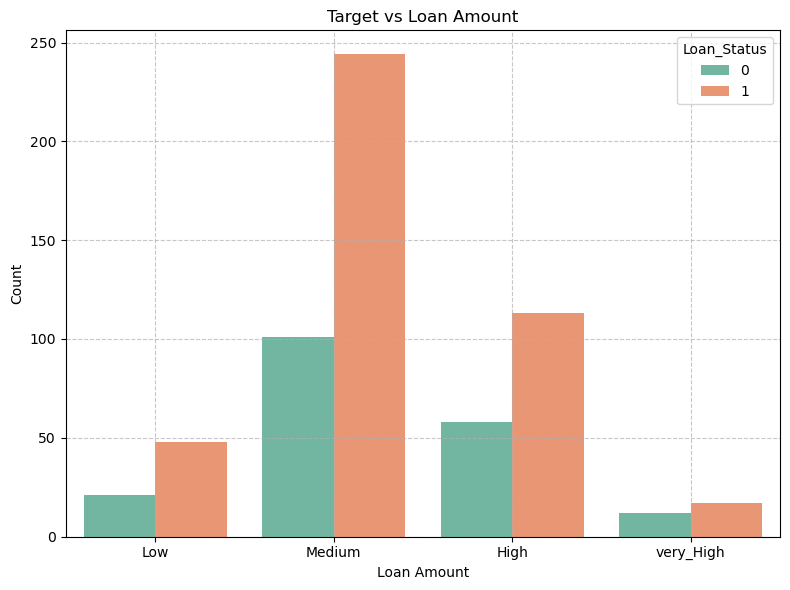

In [49]:
# create plot of 
plt.figure(figsize=(8,6))

sns.countplot(x='LoanAmount_', hue=t_, data=df_, palette='Set2')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Target vs Loan Amount')
plt.legend(title=t_)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- the proportion of loans approved are around twice as much as disapproved in each category.
- this also suggests that a lower loan amount is more likely to be approved than a higher one.

 <div style= 'color: green;  padding :10px;'> <h3> Target vs categorical columns </h3>  </div>

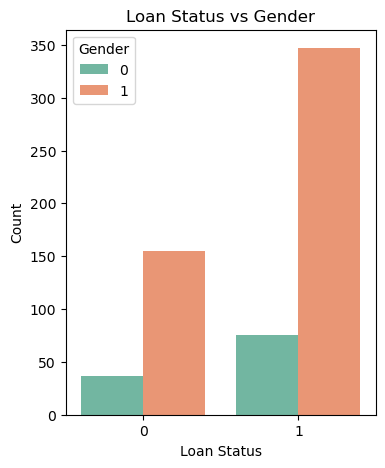

Gender,0,1
Loan_Status,,
0,37,155
1,75,347


In [50]:
# create plot of target variable to gender


plt.figure(figsize=(4,5))
sns.countplot(x='Loan_Status', hue='Gender',data=df_,palette='Set2')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status vs Gender')

plt.show()

pd.crosstab(df_['Loan_Status'],df_['Gender'])

- proportionally, for both female and male applicants, the approved or not approved rate are very similar

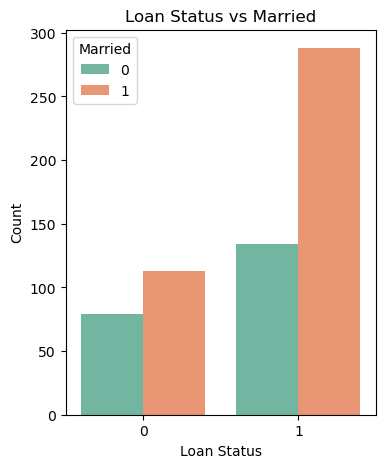

Married,0,1
Loan_Status,,
0,79,113
1,134,288


In [51]:
# create plot of target variable to 
plt.figure(figsize=(4,5))
sns.countplot(x='Loan_Status', hue='Married',data=df_,palette='Set2')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status vs Married')

plt.show()

pd.crosstab(df_['Loan_Status'],df_['Married'])

- here we can see that married applicants are more likely to be approved that not married applicants.

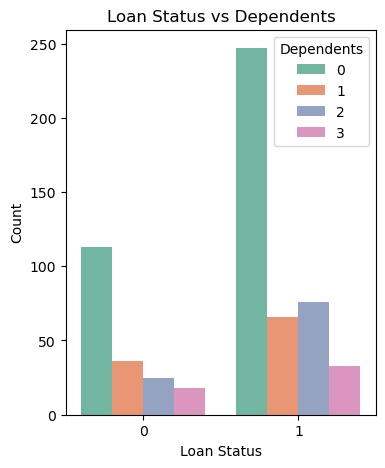

Dependents,0,1,2,3
Loan_Status,,,,
0,113,36,25,18
1,247,66,76,33


In [52]:
# create plot of target variable to 
plt.figure(figsize=(4,5))
sns.countplot(x='Loan_Status', hue='Dependents',data=df_,palette='Set2')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status vs Dependents')

plt.show()

pd.crosstab(df_['Loan_Status'],df_['Dependents'])

- the majority of both approved and not approved loans do not have dependents.
- the distribution of depended from 1 to +3 are similar across both .






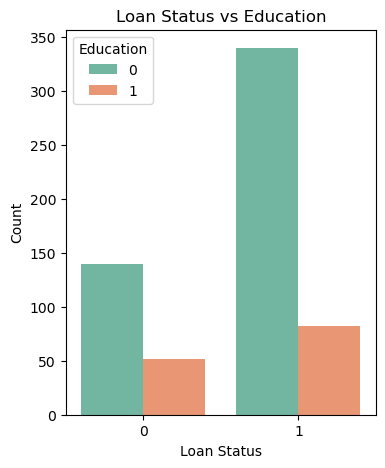

Education,0,1
Loan_Status,,
0,140,52
1,340,82


In [53]:
# create plot of target variable to 
plt.figure(figsize=(4,5))
sns.countplot(x='Loan_Status', hue='Education',data=df_,palette='Set2')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status vs Education')

plt.show()

pd.crosstab(df_['Loan_Status'],df_['Education'])

- graduates are highly more likely to get approved than a not graduated applicant

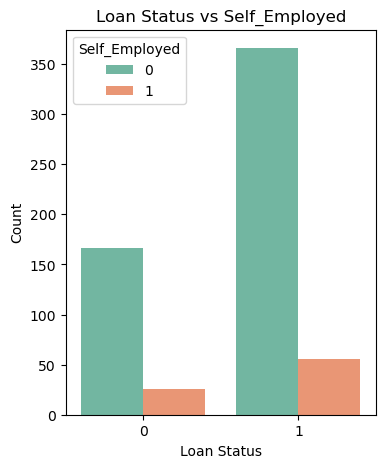

Self_Employed,0,1
Loan_Status,,
0,166,26
1,366,56


In [54]:
# create plot of target variable to 
plt.figure(figsize=(4,5))
sns.countplot(x='Loan_Status', hue='Self_Employed',data=df_,palette='Set2')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status vs Self_Employed')

plt.show()

pd.crosstab(df_['Loan_Status'],df_['Self_Employed'])

- self-employeed individuals are much more likely to be approved.

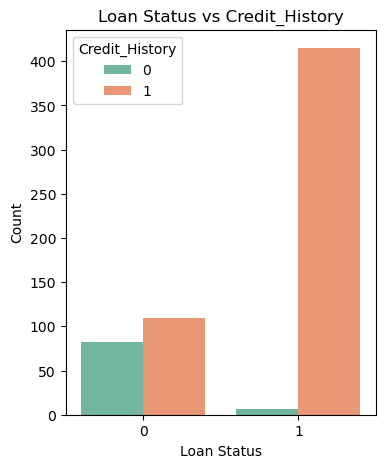

Credit_History,0,1
Loan_Status,,
0,82,110
1,7,415


In [55]:
# create plot of target variable to 
plt.figure(figsize=(4,5))
sns.countplot(x='Loan_Status', hue='Credit_History',data=df_,palette='Set2')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status vs Credit_History')

plt.show()

pd.crosstab(df_['Loan_Status'],df_['Credit_History'])

- indivuals with a credit history of 1 are much more likely to be approved 

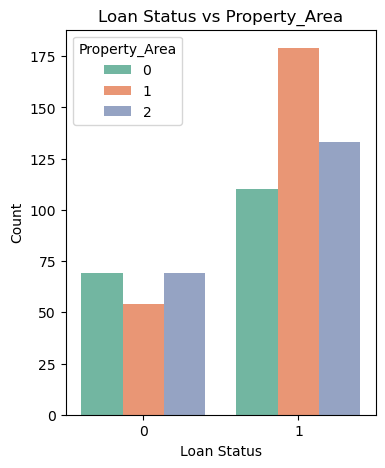

Property_Area,0,1,2
Loan_Status,,,
0,69,54,69
1,110,179,133


In [56]:
# create plot of target variable to 
plt.figure(figsize=(4,5))
sns.countplot(x='Loan_Status', hue='Property_Area',data=df_,palette='Set2')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status vs Property_Area')

plt.show()

pd.crosstab(df_['Loan_Status'],df_['Property_Area'])

- semiurban property area has a higher proportion of approval than urbam or rural areas

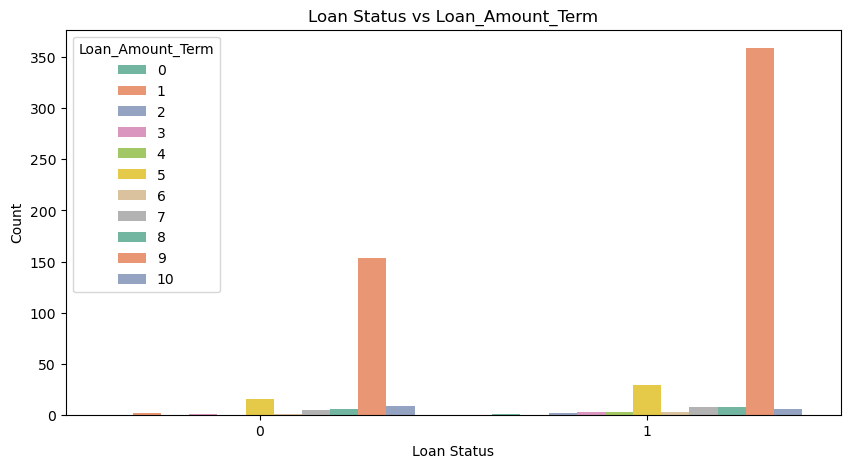

Loan_Amount_Term,0,1,2,3,4,5,6,7,8,9,10
Loan_Status,,,,,,,,,,,
0,0,2,0,1,0,15,1,5,6,153,9
1,1,0,2,3,3,29,3,8,8,359,6


In [57]:
# create plot of target variable to 
plt.figure(figsize=(10,5))
sns.countplot(x='Loan_Status', hue='Loan_Amount_Term',data=df_,palette='Set2')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status vs Loan_Amount_Term')

plt.show()

pd.crosstab(df_['Loan_Status'],df_['Loan_Amount_Term'])


_________________

 <div style= 'color: green;  padding :10px;'> <h3> Multivariate analysis</h3>  </div>

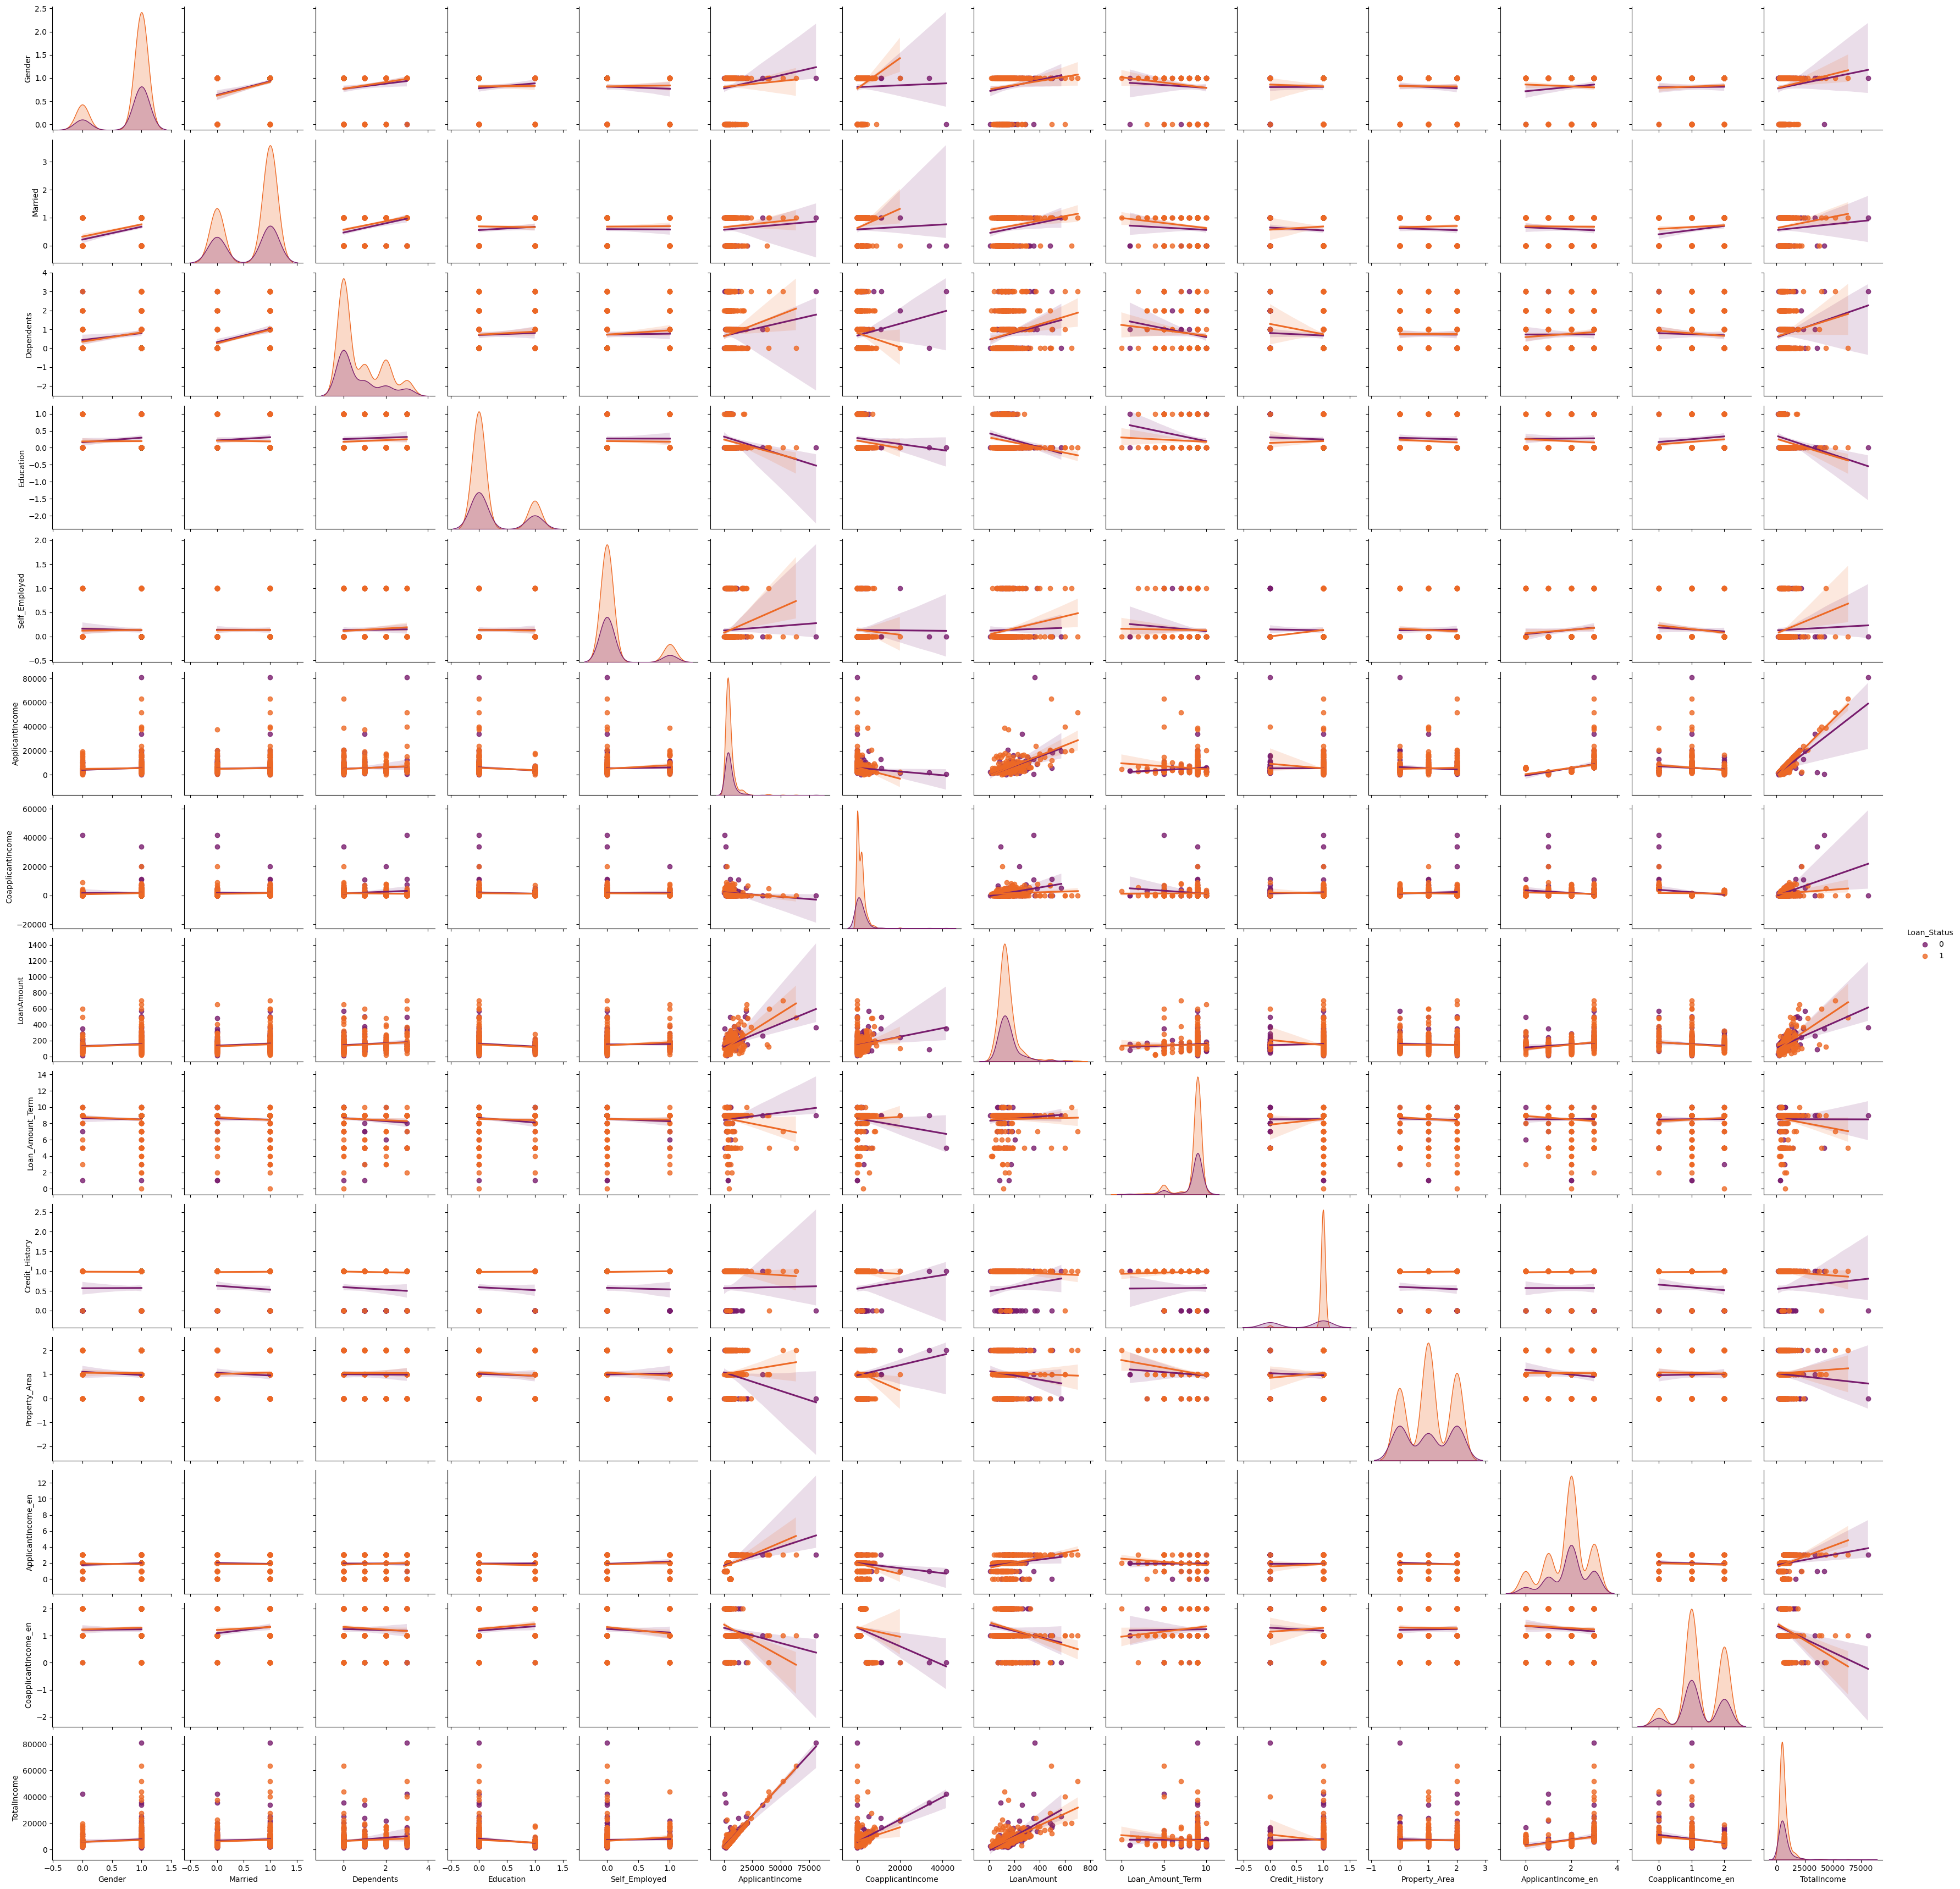

In [58]:
sns.pairplot(df_,hue=t_, palette='inferno', diag_kind='kde',kind='reg', )
plt.show()

In [59]:
mat_cols=['Loan_Status','TotalIncome', 'LoanAmount', 'CoapplicantIncome', 'ApplicantIncome' ]
mat_cols

['Loan_Status',
 'TotalIncome',
 'LoanAmount',
 'CoapplicantIncome',
 'ApplicantIncome']

In [60]:
#drop encoded columns uses for observation purpose only 
drop_=['ApplicantIncome_en', 'CoapplicantIncome_en', 'ApplicantIncome_', 'CoapplicantIncome_','Total_Income', 'LoanAmount_']
df_=df_.drop(columns=drop_)
df_

,Loan_Status,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
1,1,1,0,0,0,0,5849.0,0.0,146.412162,9,1,2,5849.0
2,0,1,1,1,0,0,4583.0,1508.0,128.000000,9,1,0,6091.0
3,1,1,1,0,0,1,3000.0,0.0,66.000000,9,1,2,3000.0
4,1,1,1,0,1,0,2583.0,2358.0,120.000000,9,1,2,4941.0
5,1,1,0,0,0,0,6000.0,0.0,141.000000,9,1,2,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,0,0,0,0,0,2900.0,0.0,71.000000,9,1,0,2900.0
611,1,1,1,3,0,0,4106.0,0.0,40.000000,5,1,0,4106.0
612,1,1,1,1,0,0,8072.0,240.0,253.000000,9,1,2,8312.0
613,1,1,1,2,0,0,7583.0,0.0,187.000000,9,1,2,7583.0


In [61]:
df_[mat_cols].corr()

,Loan_Status,TotalIncome,LoanAmount,CoapplicantIncome,ApplicantIncome
Loan_Status,1.000000,-0.031271,-0.036416,-0.059187,-0.004710
TotalIncome,-0.031271,1.000000,0.620102,0.342781,0.893037
LoanAmount,-0.036416,0.620102,1.000000,0.187828,0.565620
CoapplicantIncome,-0.059187,0.342781,0.187828,1.000000,-0.116605
ApplicantIncome,-0.004710,0.893037,0.565620,-0.116605,1.000000


 <div style= 'color: green;  padding :10px;'> <h3> Heatmap of Correlation</h3>  </div>

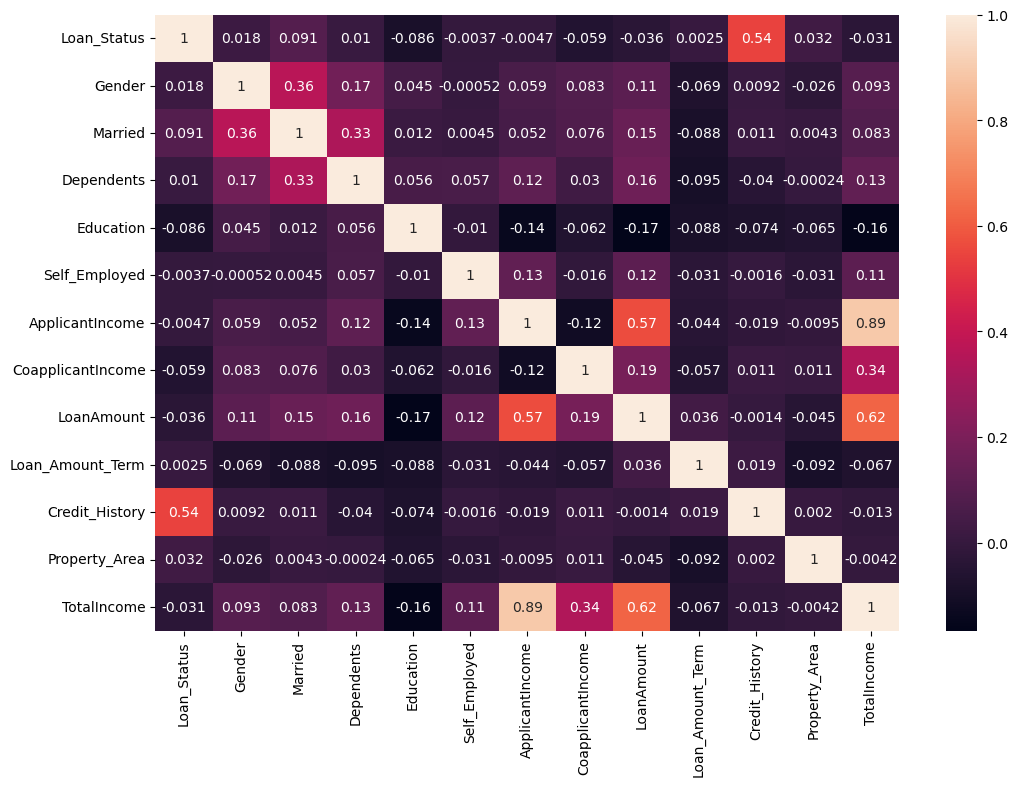

In [62]:
plt.figure(figsize=(12,8))
corr_=(df_.corr())
sns.heatmap(corr_, annot=True)
plt.show()


- the most positivily correlated to the target is Credit_History at 0.54. this is moderate
- next is Married at 0.09, followed by Property_Area
- TotalIncome and ApplicantIncome are highely correlated at 0.89
- TotalIncome and Loanamount at correlated at 0.62

- i will remove the combined features and leave only TOTincome

In [63]:
df_=df_.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], axis=1)
df_

,Loan_Status,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
1,1,1,0,0,0,0,146.412162,9,1,2,5849.0
2,0,1,1,1,0,0,128.000000,9,1,0,6091.0
3,1,1,1,0,0,1,66.000000,9,1,2,3000.0
4,1,1,1,0,1,0,120.000000,9,1,2,4941.0
5,1,1,0,0,0,0,141.000000,9,1,2,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
610,1,0,0,0,0,0,71.000000,9,1,0,2900.0
611,1,1,1,3,0,0,40.000000,5,1,0,4106.0
612,1,1,1,1,0,0,253.000000,9,1,2,8312.0
613,1,1,1,2,0,0,187.000000,9,1,2,7583.0


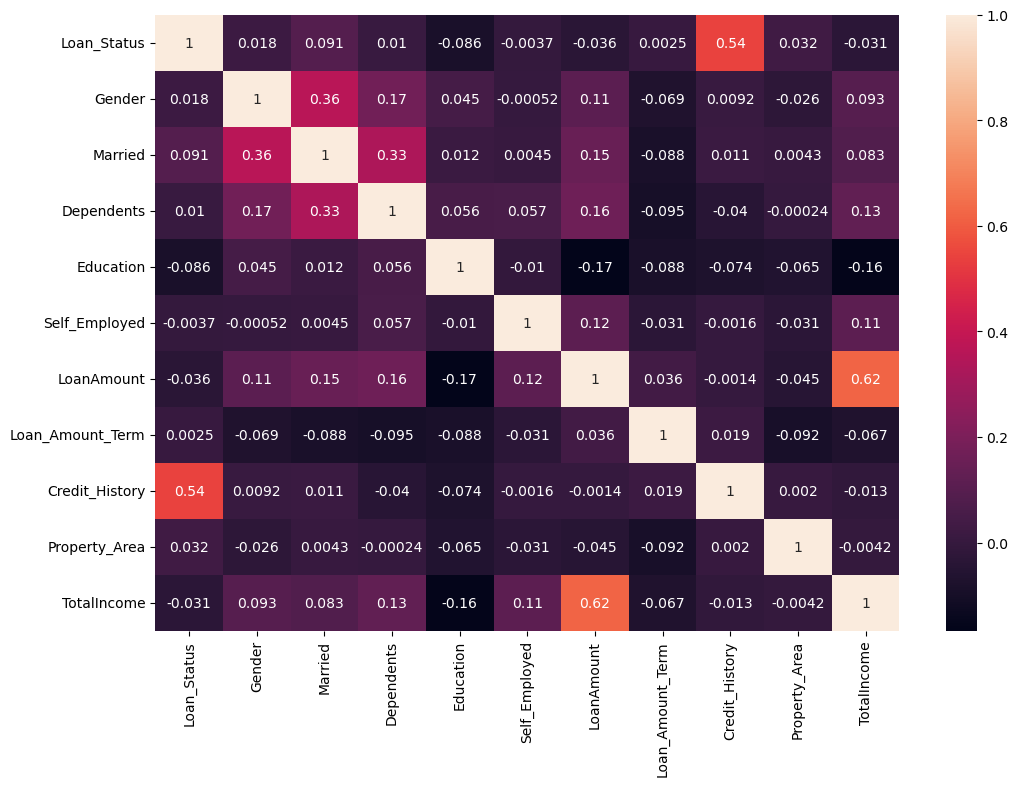

In [64]:
plt.figure(figsize=(12,8))
corr_=(df_.corr())
sns.heatmap(corr_, annot=True)
plt.show()



In [65]:
# list of correlation to loan_Status

loan_corr=corr_['Loan_Status']

loan_df=loan_corr.reset_index()
loan_df.columns=['Feature', 'Loan_Status']

loan_df=loan_df.sort_values(by='Loan_Status', ascending=False)
loan_df

,Feature,Loan_Status
0,Loan_Status,1.000000
8,Credit_History,0.540556
2,Married,0.091478
9,Property_Area,0.032112
1,Gender,0.017987
3,Dependents,0.010118
7,Loan_Amount_Term,0.002512
5,Self_Employed,-0.003700
10,TotalIncome,-0.031271
6,LoanAmount,-0.036416


 <div style= 'color: green;  padding :10px;'> <h3> Identify/remove outliers</h3>  </div>

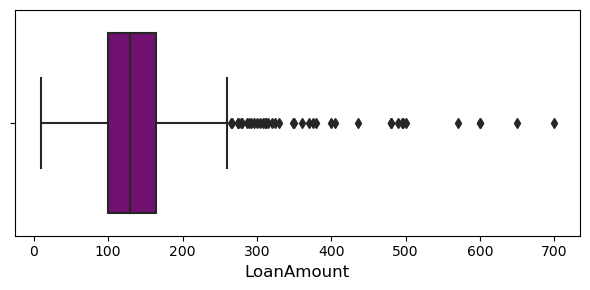

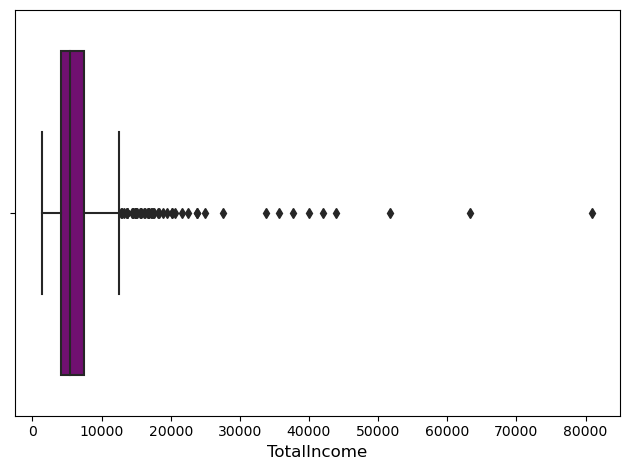

In [66]:

plt.figure(figsize=(6,3))

sns.boxplot(df_,x='LoanAmount', color='purple')
plt.xlabel('LoanAmount', fontsize=12)
plt.tight_layout()
plt.show()

sns.boxplot(df_,x='TotalIncome', color='purple')
plt.xlabel('TotalIncome', fontsize=12)
plt.tight_layout()
plt.show()
    

 <div style= 'color: green;  padding :10px;'> <h3> Skewness</h3>  </div>

In [67]:
df_[['LoanAmount','TotalIncome']].skew()

LoanAmount     2.726601
TotalIncome    5.633449
dtype: float64

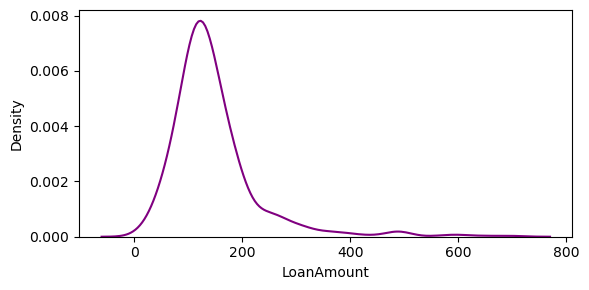

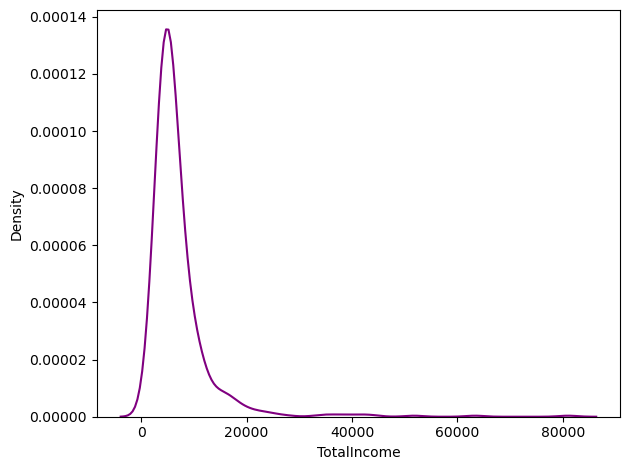

In [68]:

plt.figure(figsize=(6,3))

sns.kdeplot(df_,x='LoanAmount', color='purple')
plt.xlabel('LoanAmount')
plt.tight_layout()
plt.show()

sns.kdeplot(df_,x='TotalIncome', color='purple')
plt.xlabel('TotalIncome')
plt.tight_layout()
plt.show()
    

In [69]:
num_cols2=['TotalIncome','LoanAmount']

#- Z score Method 

# calculate z-score 

z_scores= stats.zscore(df_[num_cols2])

df_zscore=np.abs(z_scores)

#define threshold 
threshold =3

#create df with no outliers 
df_loan=df_[(df_zscore < threshold).all(axis=1)]

print('The new dataframe without outliers:', df_loan.shape)
print('Percentage of data loss', (df_.shape[0]-df_loan.shape[0])/df_.shape[0]*100)
df_loan.sample(5)

The new dataframe without outliers: (593, 11)
Percentage of data loss 3.420195439739414


,Loan_Status,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
430,1,1,0,0,1,0,60.0,5,1,2,2717.0
387,1,1,0,0,1,0,132.0,9,1,1,3946.0
119,0,1,1,0,0,0,175.0,9,1,0,7710.0
401,0,1,1,2,1,0,45.0,5,0,2,2889.0
25,0,1,1,1,0,0,151.0,9,1,1,6642.0


In [70]:
df_loan[num_cols2].skew().sort_values()

LoanAmount     1.152306
TotalIncome    2.054852
dtype: float64

- skewness is positive and above 0.5 in all columns
- i will not be changeing loan_Amount 
- 

In [71]:
#log transform 
df_loan['LoanAmount']=np.cbrt(df_loan['LoanAmount'])

df_loan['TotalIncome']=np.log1p(df_loan['TotalIncome'])



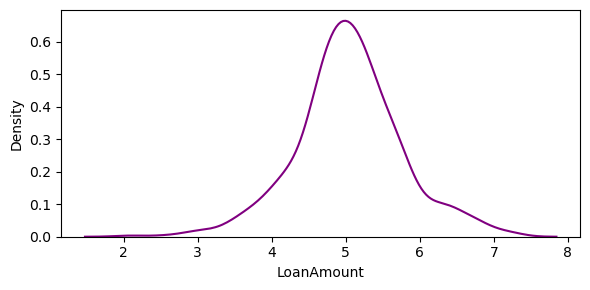

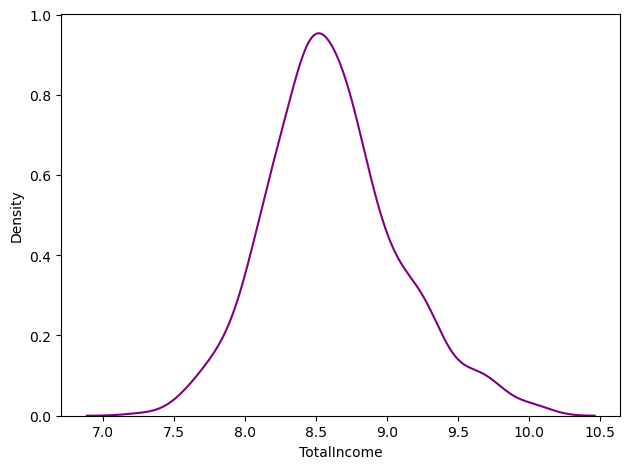

In [72]:

plt.figure(figsize=(6,3))

sns.kdeplot(df_loan,x='LoanAmount', color='purple')
plt.xlabel('LoanAmount')
plt.tight_layout()
plt.show()

sns.kdeplot(df_loan,x='TotalIncome', color='purple')
plt.xlabel('TotalIncome')
plt.tight_layout()
plt.show()
    

In [73]:
df_loan[num_cols2].skew().sort_values()

LoanAmount    -0.040738
TotalIncome    0.426608
dtype: float64

- now all skew is within range

 <div style= 'color: green;  padding :10px;'> <h3> Train/Test split</h3>  </div>

In [74]:
X=df_loan.drop('Loan_Status', axis=1)
Y=df_loan['Loan_Status']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=i)


smote=SMOTE(random_state=i)
X_train_smote,Y_train_smote=smote.fit_resample(X_train,Y_train)


print(f'Training features dimension:,{X_train_smote.shape}')
print(f'Testing featuresdimension:,{X_test.shape}')
print(f'Training features dimension:,{Y_train_smote.shape}')
print(f'Testing features dimension:,{Y_test.shape}')

Training features dimension:,(614, 10)
Testing featuresdimension:,(149, 10)
Training features dimension:,(614,)
Testing features dimension:,(149,)


 <div style= 'color: green;  padding :10px;'> <h3> Standard Scaler</h3>  </div>

In [75]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

 <div style= 'color: green;  padding :10px;'> <h3> VIF</h3>  </div>

In [76]:
#find VIR for each column 
X_scaled_df=pd.DataFrame(X_train_scaled,columns=X.columns)
vif= pd.DataFrame()
vif['Features']= X_scaled_df.columns
vif['VIF Factor']=[variance_inflation_factor(X_scaled_df.values, i) for i in range (len(X_scaled_df.columns))]

vif.sort_values(by='VIF Factor', ascending=False)

,Features,VIF Factor
9,TotalIncome,1.775876
5,LoanAmount,1.730918
1,Married,1.325181
0,Gender,1.195415
2,Dependents,1.167958
6,Loan_Amount_Term,1.092711
3,Education,1.083370
4,Self_Employed,1.061646
8,Property_Area,1.045738
7,Credit_History,1.017204


- all less than 10

 <div style= 'color: green;  padding :10px;'> <h3> Logistic Regression</h3>  </div>

In [77]:

#create list for results
results_=[]

for i in range(1,500):
    X_train_split,X_test_split,Y_train_split,Y_test_split=train_test_split(X_train_scaled,Y_train,test_size=0.3,random_state=i)
    
    smote=SMOTE(random_state=i)
    X_train_smote,Y_train_smote=smote.fit_resample(X_train_split,Y_train_split)
    
    
    model_log=LogisticRegression(random_state=i)
    model_log.fit(X_train_smote,Y_train_smote)

    Y_train_pred=model_log.predict(X_train_smote)
    Y_test_pred=model_log.predict(X_test_split)

    train_score= accuracy_score(Y_train_smote, Y_train_pred)
    test_score=accuracy_score(Y_test_split, Y_test_pred)
    
    results_.append({
        'Random State': i,
        'Train Accuracy': train_score *100,
        'Test Accuracy': test_score*100
          })
train_test_df=pd.DataFrame(results_)

train_test_df_sort=train_test_df.sort_values('Test Accuracy', ascending=False)
train_test_df_sort



,Random State,Train Accuracy,Test Accuracy
192,193,72.535211,85.820896
397,398,70.243902,85.074627
477,478,68.750000,85.074627
422,423,72.222222,85.074627
68,69,73.364486,85.074627
...,...,...,...
131,132,73.023256,65.671642
189,190,73.364486,65.671642
454,455,75.333333,65.671642
431,432,75.000000,64.179104


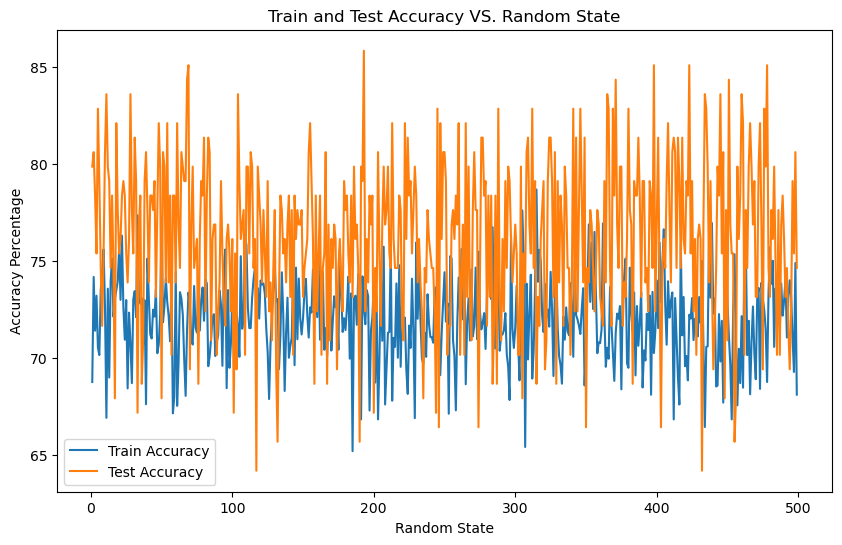

In [78]:
#plot
plt.figure(figsize=(10,6))
plt.plot(train_test_df['Random State'], train_test_df['Train Accuracy'], label='Train Accuracy')
plt.plot(train_test_df['Random State'], train_test_df['Test Accuracy'], label='Test Accuracy')
plt.xlabel('Random State')
plt.ylabel('Accuracy Percentage')
plt.title('Train and Test Accuracy VS. Random State')
plt.legend()
plt.show()

Final Model Evaluation:
Training Accuracy : 0.70
Testing Accuracy : 0.84

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        40
           1       0.82      1.00      0.90        94

    accuracy                           0.84       134
   macro avg       0.91      0.74      0.77       134
weighted avg       0.87      0.84      0.82       134



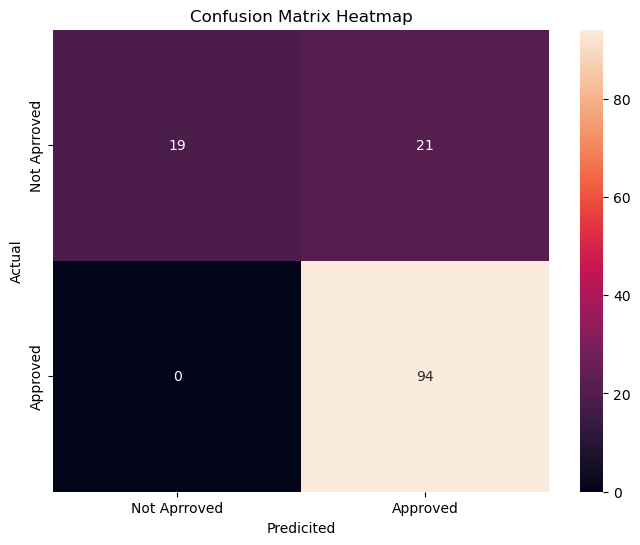

In [79]:

best_r_state=train_test_df_sort.iloc[0]['Random State']
X_train_split,X_test_split,Y_train_split,Y_test_split=train_test_split(X_train_scaled,Y_train,test_size=0.3,random_state=int(best_r_state))

smote=SMOTE(random_state=i)
X_train_smote,Y_train_smote=smote.fit_resample(X_train_split,Y_train_split)

model_log=LogisticRegression(random_state=i)
model_log.fit(X_train_split,Y_train_split)

Y_train_pred=model_log.predict(X_train_smote)
Y_test_pred=model_log.predict(X_test_split)

print('Final Model Evaluation:')
print(f'Training Accuracy : {accuracy_score(Y_train_smote,(Y_train_pred)) :.2f}')
print(f'Testing Accuracy : {accuracy_score(Y_test_split,Y_test_pred ) :.2f}')
print('\nClassification report:')
print(classification_report(Y_test_split, Y_test_pred))

con_mat=confusion_matrix(Y_test_split, Y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(con_mat, annot=True,fmt='g', xticklabels=['Not Aprroved', 'Approved'], yticklabels=['Not Aprroved', 'Approved'])
plt.xlabel('Predicited')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

 <div style= 'color: green;  padding :10px;'> <h3> Random Forest Classifier</h3>  </div>

In [80]:

#create list for results
results_2=[]

for i in range(1,500):
    X_train_split,X_test_split,Y_train_split,Y_test_split=train_test_split(X_train_scaled,Y_train,test_size=0.3,random_state=i)
    
    smote=SMOTE(random_state=i)
    X_train_smote,Y_train_smote=smote.fit_resample(X_train_split,Y_train_split)
    
    
    model_rfc=RandomForestClassifier(random_state=i)
    model_rfc.fit(X_train_smote,Y_train_smote)

    Y_train_pred=model_rfc.predict(X_train_smote)
    Y_test_pred=model_rfc.predict(X_test_split)

    train_score2= accuracy_score(Y_train_smote, Y_train_pred)
    test_score2=accuracy_score(Y_test_split, Y_test_pred)
    
    results_2.append({
        'Random State': i,
        'Train Accuracy': train_score2 *100,
        'Test Accuracy': test_score2*100
          })
train_test_df2=pd.DataFrame(results_2)

train_test_df_sort2=train_test_df2.sort_values('Test Accuracy', ascending=False)
train_test_df_sort2



,Random State,Train Accuracy,Test Accuracy
423,424,100.0,85.074627
374,375,100.0,84.328358
466,467,100.0,83.582090
422,423,100.0,82.835821
205,206,100.0,82.835821
...,...,...,...
314,315,100.0,67.164179
493,494,100.0,67.164179
297,298,100.0,67.164179
454,455,100.0,67.164179


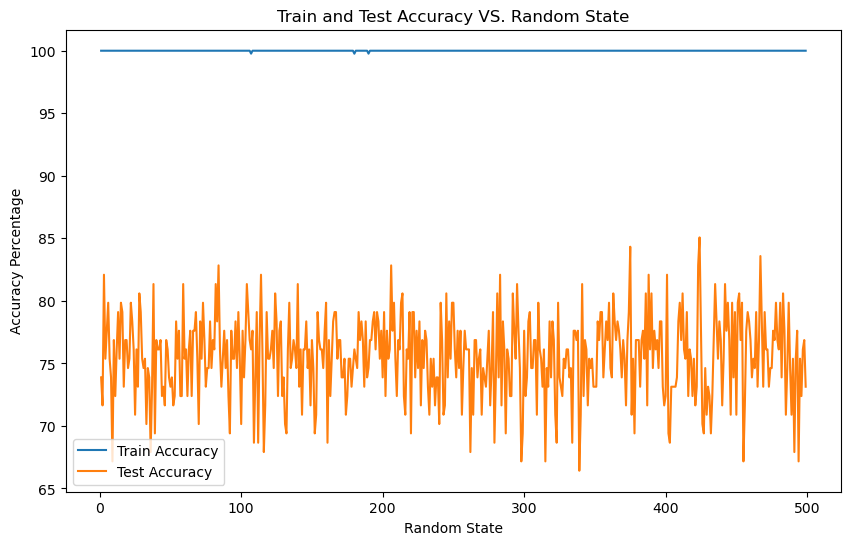

In [81]:
#plot
plt.figure(figsize=(10,6))
plt.plot(train_test_df2['Random State'], train_test_df2['Train Accuracy'], label='Train Accuracy')
plt.plot(train_test_df2['Random State'], train_test_df2['Test Accuracy'], label='Test Accuracy')
plt.xlabel('Random State')
plt.ylabel('Accuracy Percentage')
plt.title('Train and Test Accuracy VS. Random State')
plt.legend()
plt.show()

Final Model Evaluation:
Training Accuracy : 0.87
Testing Accuracy : 0.83

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.53      0.68        45
           1       0.81      0.98      0.88        89

    accuracy                           0.83       134
   macro avg       0.86      0.76      0.78       134
weighted avg       0.85      0.83      0.81       134



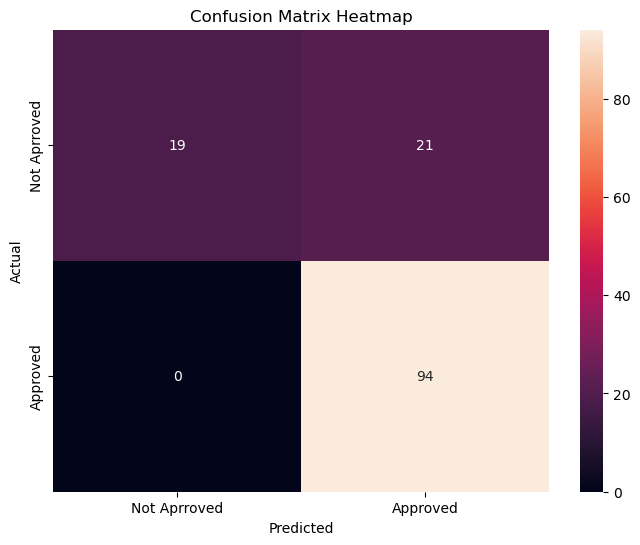

In [82]:
best_r_state2=train_test_df_sort2.iloc[0]['Random State']
X_train_split,X_test_split,Y_train_split,Y_test_split=train_test_split(X_train_scaled,Y_train,test_size=0.30,random_state=int(best_r_state2))

smote=SMOTE(random_state=i)
X_train_smote,Y_train_smote=smote.fit_resample(X_train_split,Y_train_split)
    
model_rfc=RandomForestClassifier(random_state=i)
model_rfc.fit(X_train_split,Y_train_split)

Y_train_pred=model_rfc.predict(X_train_smote)
Y_test_pred=model_rfc.predict(X_test_split)

print('Final Model Evaluation:')
print(f'Training Accuracy : {accuracy_score(Y_train_smote,(Y_train_pred)) :.2f}')
print(f'Testing Accuracy : {accuracy_score(Y_test_split,Y_test_pred ) :.2f}')
print('\nClassification report:')
print(classification_report(Y_test_split, Y_test_pred))

con_mat2=confusion_matrix(Y_test_split, Y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(con_mat, annot=True,fmt='g', xticklabels=['Not Aprroved', 'Approved'], yticklabels=['Not Aprroved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

 <div style= 'color: green;  padding :10px;'> <h3> SVM</h3>  </div>

In [83]:

#create list for results
results_3=[]

for i in range(1,500):
    X_train_split,X_test_split,Y_train_split,Y_test_split=train_test_split(X_train_scaled,Y_train,test_size=0.3,random_state=i)
    
    smote=SMOTE(random_state=i)
    X_train_smote,Y_train_smote=smote.fit_resample(X_train_split,Y_train_split)
    
    
    model_svm=SVC()
    model_svm.fit(X_train_smote,Y_train_smote)

    Y_train_pred=model_svm.predict(X_train_smote)
    Y_test_pred=model_svm.predict(X_test_split)

    train_score3= accuracy_score(Y_train_smote, Y_train_pred)
    test_score3=accuracy_score(Y_test_split, Y_test_pred)
    
    results_3.append({
        'Random State': i,
        'Train Accuracy': train_score3 *100,
        'Test Accuracy': test_score3*100
          })
train_test_df3=pd.DataFrame(results_3)

train_test_df_sort3=train_test_df3.sort_values('Test Accuracy', ascending=False)
train_test_df_sort3



,Random State,Train Accuracy,Test Accuracy
68,69,79.439252,86.567164
446,447,77.830189,86.567164
248,249,77.644231,85.820896
103,104,77.464789,85.074627
212,213,79.086538,85.074627
...,...,...,...
75,76,79.223744,65.671642
131,132,82.093023,65.671642
454,455,81.555556,64.179104
431,432,83.715596,63.432836


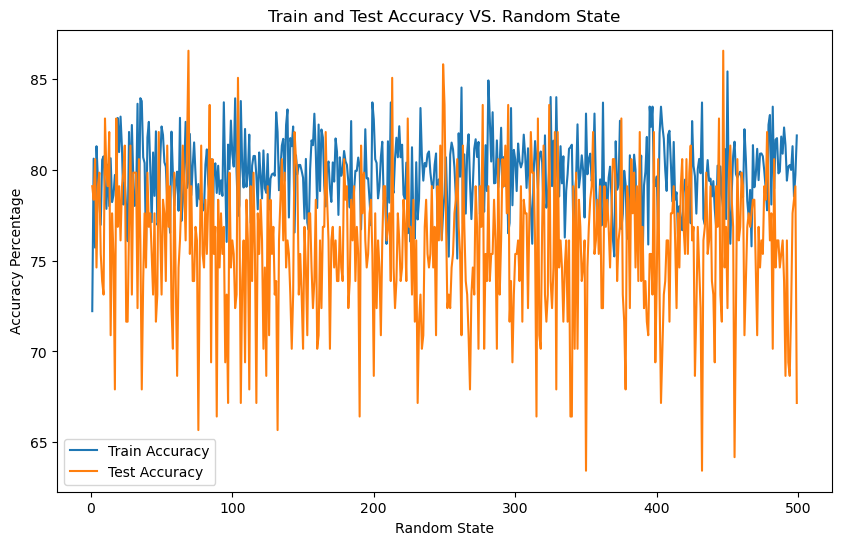

In [84]:
#plot
plt.figure(figsize=(10,6))
plt.plot(train_test_df3['Random State'], train_test_df3['Train Accuracy'], label='Train Accuracy')
plt.plot(train_test_df3['Random State'], train_test_df3['Test Accuracy'], label='Test Accuracy')
plt.xlabel('Random State')
plt.ylabel('Accuracy Percentage')
plt.title('Train and Test Accuracy VS. Random State')
plt.legend()
plt.show()

Final Model Evaluation:
Training Accuracy : 0.83
Testing Accuracy : 0.96

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        41
           1       0.95      1.00      0.97        93

    accuracy                           0.96       134
   macro avg       0.97      0.94      0.95       134
weighted avg       0.96      0.96      0.96       134



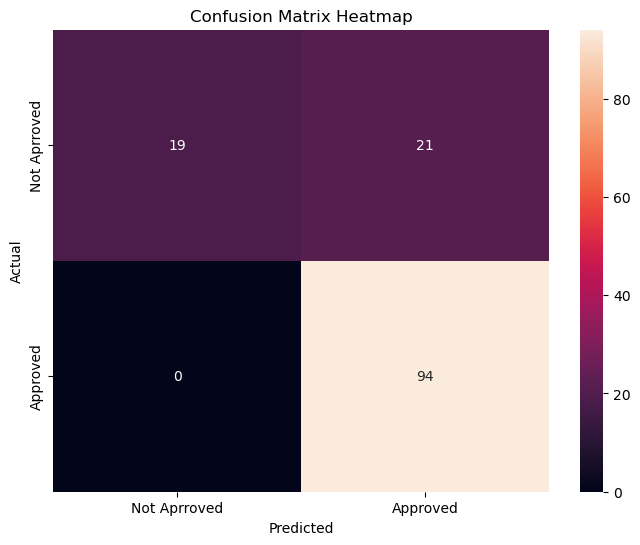

In [85]:
best_r_state3=train_test_df_sort3.iloc[0]['Random State']
X_train_split,X_test_split,Y_train_split,Y_test_split=train_test_split(X_train_scaled,Y_train,test_size=0.30,random_state=int(best_r_state3))

smote=SMOTE()
X_train_smote,Y_train_smote=smote.fit_resample(X_train_split,Y_train_split)
    
model_svm=SVC(random_state=i)
model_svm.fit(X_train_split,Y_train_split)

Y_train_pred=model_rfc.predict(X_train_smote)
Y_test_pred=model_rfc.predict(X_test_split)

print('Final Model Evaluation:')
print(f'Training Accuracy : {accuracy_score(Y_train_smote,(Y_train_pred)) :.2f}')
print(f'Testing Accuracy : {accuracy_score(Y_test_split,Y_test_pred ) :.2f}')
print('\nClassification report:')
print(classification_report(Y_test_split, Y_test_pred))

con_mat3=confusion_matrix(Y_test_split, Y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(con_mat, annot=True,fmt='g', xticklabels=['Not Aprroved', 'Approved'], yticklabels=['Not Aprroved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

 <div style= 'color: green;  padding :10px;'> <h3> K Neighbor Classifier</h3>  </div>

In [86]:

#create list for results
results_4=[]

for i in range(1,500):
    X_train_split,X_test_split,Y_train_split,Y_test_split=train_test_split(X_train_scaled,Y_train,test_size=0.3,random_state=i)
    
    smote=SMOTE(random_state=i)
    X_train_smote,Y_train_smote=smote.fit_resample(X_train_split,Y_train_split)
    
    
    model_knn=KNeighborsClassifier()
    model_knn.fit(X_train_smote,Y_train_smote)

    Y_train_pred=model_knn.predict(X_train_smote)
    Y_test_pred=model_knn.predict(X_test_split)

    train_score4= accuracy_score(Y_train_smote, Y_train_pred)
    test_score4=accuracy_score(Y_test_split, Y_test_pred)
    
    results_4.append({
        'Random State': i,
        'Train Accuracy': train_score4 *100,
        'Test Accuracy': test_score4*100
          })
train_test_df4=pd.DataFrame(results_4)

train_test_df_sort4=train_test_df4.sort_values('Test Accuracy', ascending=False)
train_test_df_sort4



,Random State,Train Accuracy,Test Accuracy
2,3,80.769231,79.850746
9,10,83.095238,78.358209
389,390,78.828829,76.865672
21,22,82.629108,76.865672
383,384,80.607477,76.119403
...,...,...,...
349,350,86.301370,58.955224
206,207,82.692308,58.955224
490,491,85.613208,58.955224
278,279,83.636364,58.955224


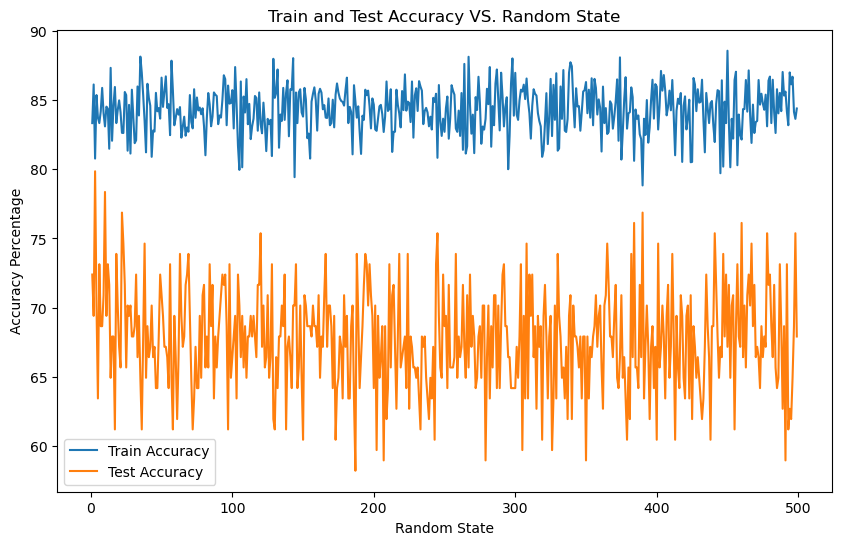

In [87]:
#plot
plt.figure(figsize=(10,6))
plt.plot(train_test_df4['Random State'], train_test_df4['Train Accuracy'], label='Train Accuracy')
plt.plot(train_test_df4['Random State'], train_test_df4['Test Accuracy'], label='Test Accuracy')
plt.xlabel('Random State')
plt.ylabel('Accuracy Percentage')
plt.title('Train and Test Accuracy VS. Random State')
plt.legend()
plt.show()

Final Model Evaluation:
Training Accuracy : 0.71
Testing Accuracy : 0.83

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.46      0.58        35
           1       0.83      0.96      0.89        99

    accuracy                           0.83       134
   macro avg       0.82      0.71      0.74       134
weighted avg       0.82      0.83      0.81       134



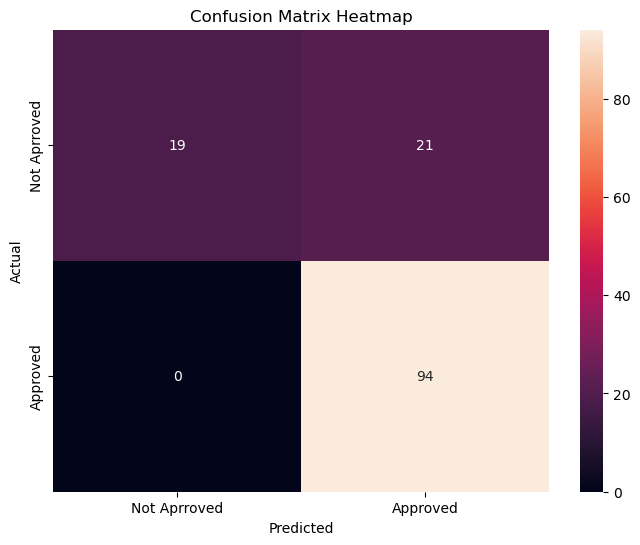

In [88]:
best_r_state4=train_test_df_sort4.iloc[0]['Random State']
X_train_split,X_test_split,Y_train_split,Y_test_split=train_test_split(X_train_scaled,Y_train,test_size=0.30,random_state=int(best_r_state4))

smote=SMOTE(random_state=i)
X_train_smote,Y_train_smote=smote.fit_resample(X_train_split,Y_train_split)
    
model_knn=KNeighborsClassifier()
model_knn.fit(X_train_split,Y_train_split)

Y_train_pred=model_knn.predict(X_train_smote)
Y_test_pred=model_knn.predict(X_test_split)

print('Final Model Evaluation:')
print(f'Training Accuracy : {accuracy_score(Y_train_smote,(Y_train_pred)) :.2f}')
print(f'Testing Accuracy : {accuracy_score(Y_test_split,Y_test_pred ) :.2f}')
print('\nClassification report:')
print(classification_report(Y_test_split, Y_test_pred))

con_mat4=confusion_matrix(Y_test_split, Y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(con_mat, annot=True,fmt='g', xticklabels=['Not Aprroved', 'Approved'], yticklabels=['Not Aprroved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

 <div style= 'color: green;  padding :10px;'> <h3> ROC-AUC curve</h3>  </div>

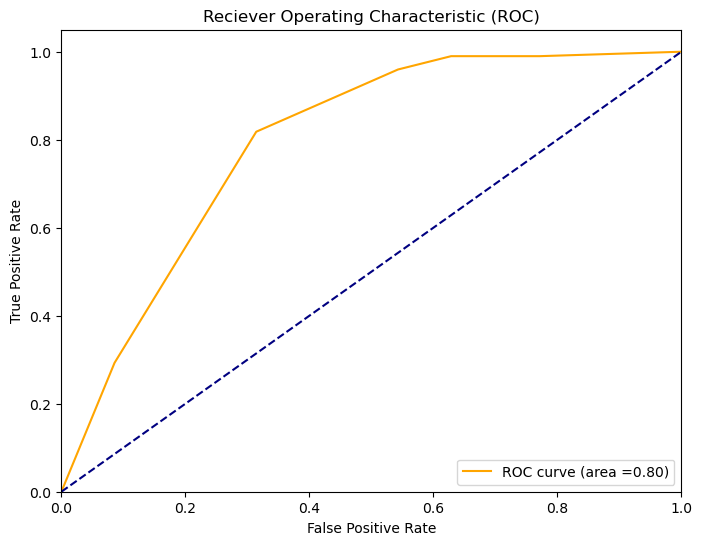

In [127]:
y_test_prob=model_knn.predict_proba(X_test_split)[:,1]

#calc ROC

fpr,tpr, thresholds=roc_curve(Y_test_split, Y_test_prob)
roc_auc=roc_auc_score(Y_test_split, Y_test_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area ={roc_auc:.2f})')
plt.plot([0,1], [0,1] ,color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()